# L10 Final Project Housing Data

## Assignment Instructions
Rename with your name in place of Studentname and make your edits and updates here. There are 32 questions for you to answer, please use **ANS:** to clearly mark your answers.


# Final Project

## Scenario

Using this notebook you will perform a challenge project. Your goal is to correctly answer a series of questions, which you will answer throuh exploration and modeling of a data set. You will use **summary statistical methods**, **visualization methods**, and **construct and test a linear regression model** to predict home prices. 


<div style="background-color: ivory; padding: 10px; border: thin solid #444;">
<p>A home builder is interested in constructing a number of homes in King County WA, USA. The builder will invest in the construction of homes which they then hope to sell at a profit. Understandably, the builder would like to understand which variables determine the value of any homes they plan to build so that they can maximize return from their investment.</p> </div>

## The data set

For this challenge, you are using a public domain data set available from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). These data include all home sales in King Co WA from May 2014 to May 2015. The label is `price`. There are 20 potential features. 

***
**Hints:** 
1. There are several features in this data set which you do not need to consider:
  - **id** is a transaction id that is independent of price.
  - **date** is the date of the transaction, but since there is only one year of data, it is not terribly useful.
  - **lat** and **long** can be ignored since geographic analysis is beyond the scope of this course.
  - **sqft_living15** and **sqft_lot15** are generally collinear to other features of similar names. 
2. The coding of missing values can be a bit problematic with this data set. Missing values are coded as zeros (0). In some cases, you may find it hard to differentiate between missing values and values that are in fact zero. 
***

***
**Note:** it is recommended that you have the following packages installed before proceeding with this challenge exercise:

- tidyverse
- hexbin
- repr

***

## Load and Prepare the Data Set

As a first step in the analysis of this data set you will load and perform some basic preparation of these data. Using the `dplyr` package the recommended processing of these data are:

1. Read the csv file, verifying that the file read correctly. 
2. For variables where are fundamentally categorical, like `bedrooms`, `grade` and `zipcode`, compute new columns of type factor. By categorical features in this case we mean features with named categories or with a small number of discrete numeric values. 
3. Verify that data types of the columns are as expected.

<div class="alert alert-block alert-success">Run the code below to perform these steps. </div>

In [1]:
## A possible solution is here:
##
## Change the full path to the  file. If in working directory use ''.
read.house = function(file = 'kc_house_data.csv'){
  require(tidyverse)
  house = read_csv(file)
  house = house %>% mutate(bedrooms_fac = as.factor(bedrooms), 
                           bathrooms_fac = as.factor(bathrooms), 
                           floors_fac = as.factor(floors), 
                           waterfront_fac = as.factor(waterfront), 
                           view_fac = as.factor(view), 
                           condition_fac = as.factor(condition), 
                           grade_fac = as.factor(grade), 
                           zipcode_fac = as.factor(zipcode))
  house
}
house = read.house()
glimpse(house)

Loading required package: tidyverse
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Parsed with column specification:
cols(
  .default = col_integer(),
  id = col_character(),
  date = col_datetime(format = ""),
  price = col_double(),
  bathrooms = col_double(),
  floors = col_double(),
  lat = col_double(),
  long = col_double()
)
See spec(...) for full column specifications.


Observations: 21,613
Variables: 29
$ id             <chr> "7129300520", "6414100192", "5631500400", "248720087...
$ date           <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 201...
$ price          <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257...
$ bedrooms       <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4...
$ bathrooms      <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00...
$ sqft_living    <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780,...
$ sqft_lot       <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 7...
$ floors         <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1....
$ waterfront     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ view           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...
$ condition      <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4...
$ grade          <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, ...
$ sqft_above     

Next, you need to consider the distribution of the label column, `price`. In the cell below create and execute a function, using ggplot2, to compute the histogram and/or density estimation of the `price` column.  

**Hints:** 
1. Make sure your plot has a proper title and axis labels. 
2. You will be creating other histograms in this lab, so make sure your function can work for any column name you specify. 

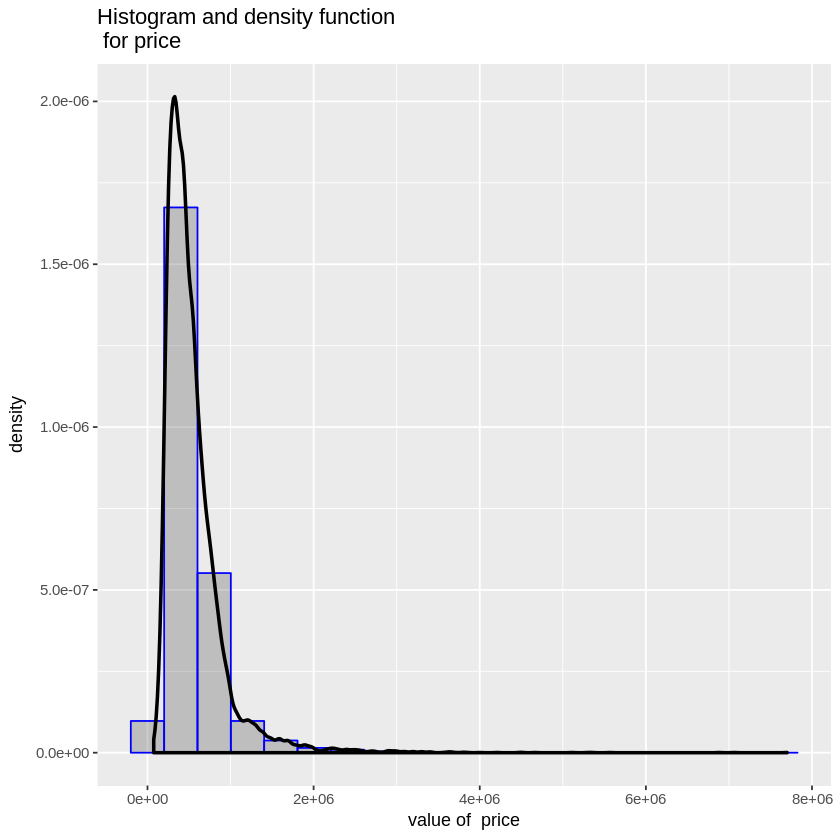

In [2]:
plot_hist = function(col, df, bins = 20){
  #require(ggplot2)
  p1 = ggplot(df, aes_string(col)) + 
    geom_histogram(aes(y = ..density..), bins = bins, 
                   alpha = 0.3, color = 'blue') +
    geom_density(size = 1) +
    xlab(paste('value of ', col)) +
    ggtitle(paste('Histogram and density function \n for', col))
  print(p1)
}

plot_hist('price', house)

<div class="alert alert-block alert-info">
Answer the following questions about your plot:</div>

Q1. Is this distribution left skewed or right skewed? **Hint:** a left skewed distribution has a long right tail. 

**ANS:** The distribution is positively-skewed with a long right tail. Left skewed per above hint.

Q2. Do you think a log transformation of these values will create a distribution closer to Normal? 

**ANS:** Yes, a log transformation may make skewed distributions less skewed.

To understand and model the factors determining home price it is necessary to transform this label value. In the cell below, use functions from the tidyverse to write code to do the following:

1. Compute a new column in the data frame containing the natural log transformation of the `price` column.
2. Plot the histogram and/or density function for the transformed column. 

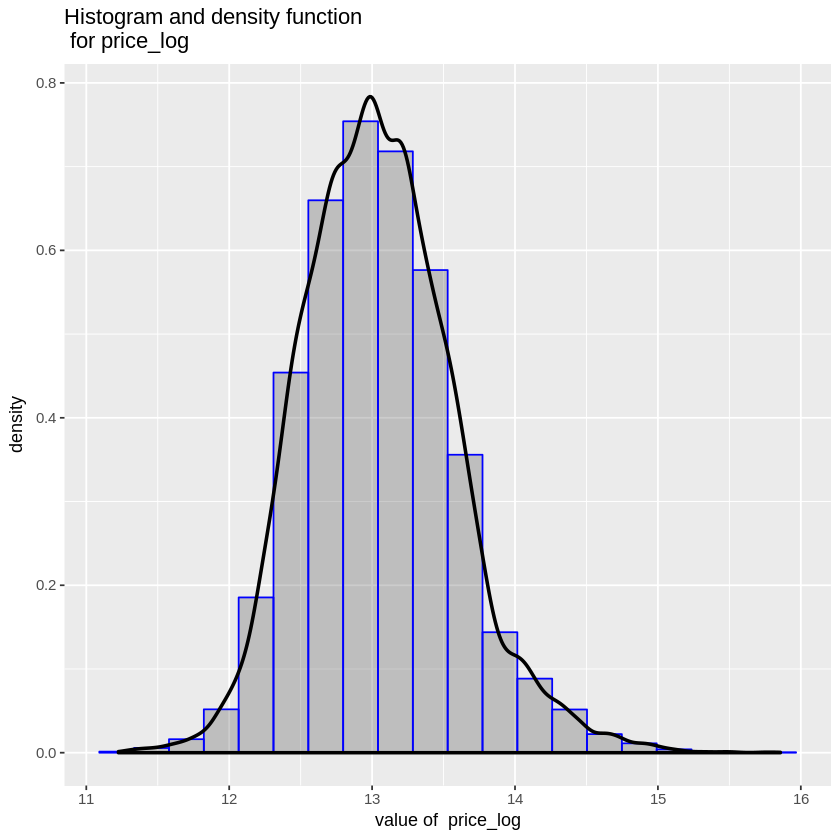

In [3]:
house = house %>% mutate(price_log = log(price))
plot_hist('price_log', house)

<div class="alert alert-block alert-info">Q3. Compare the distribution of the transformed label to the original `price` column. Is the transformed distribution significantly more symmetric? </div>
**ANS:** Yes, the transformed distribution appears more symmetric.

## Explore the Relationships in the Data

You will now use a series of plots to visualize these data and understand the relationships.   

### Univariate plots
First, in the cell below, use ggplot2 create a series of histogram and/or density estimation plot for the following features:
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built

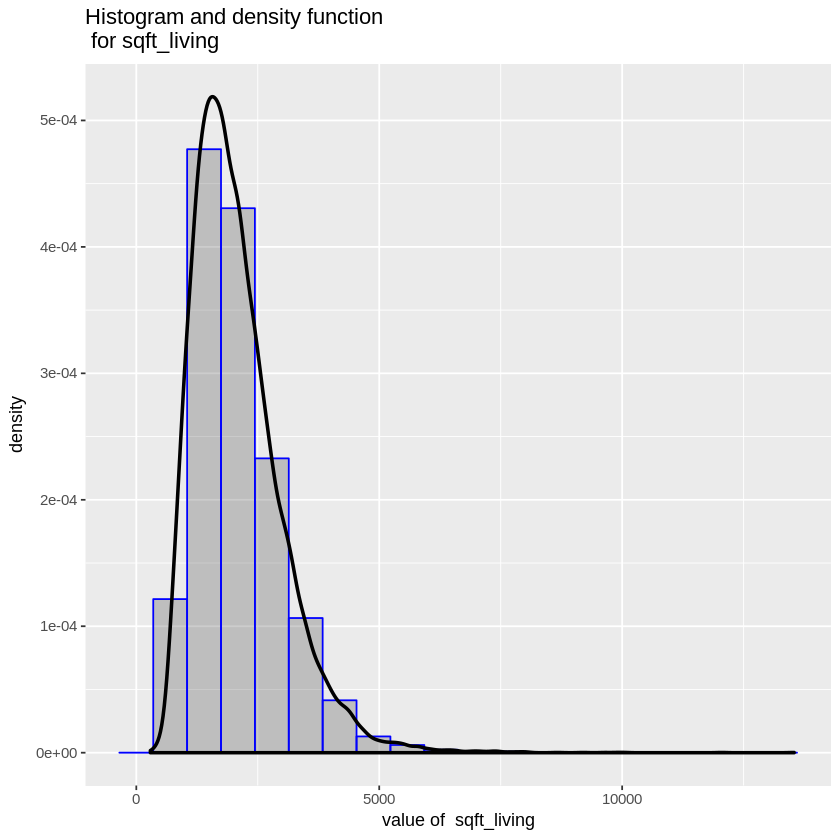

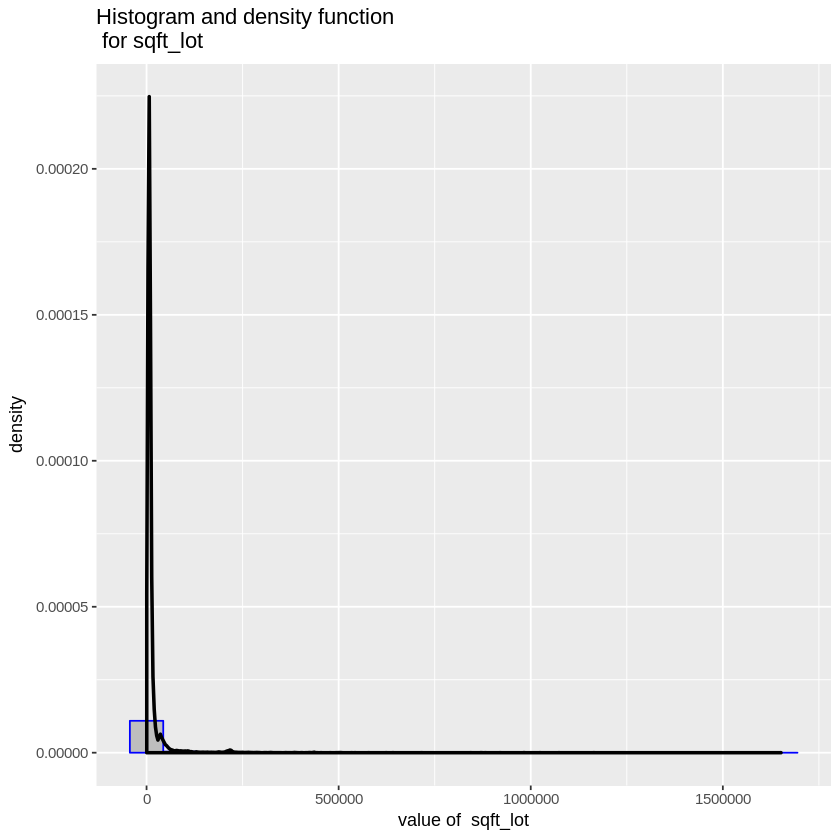

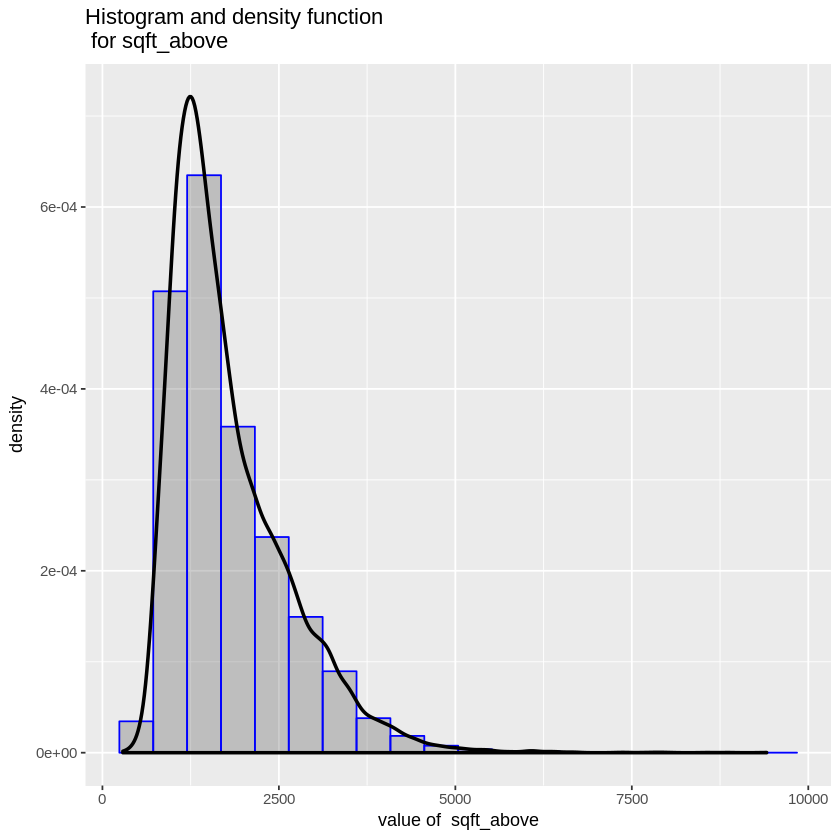

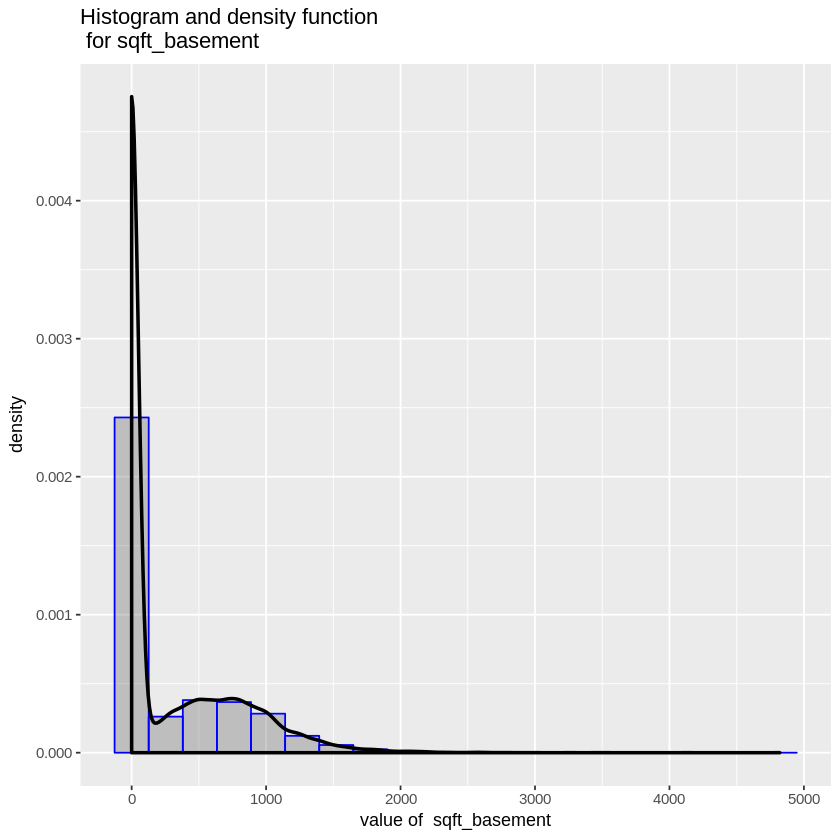

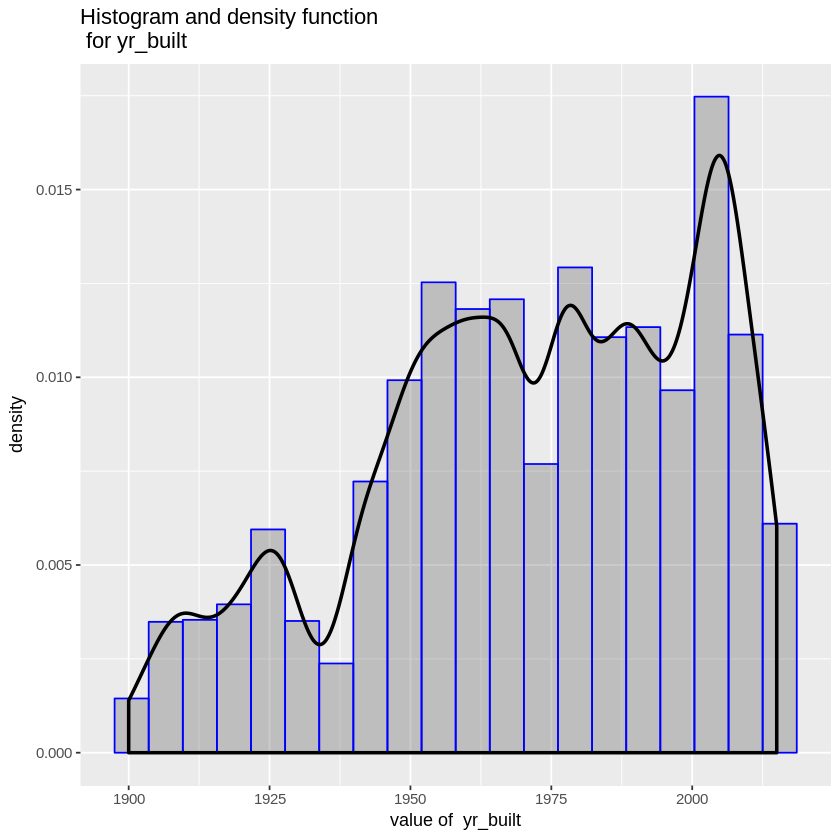

In [4]:
cols = c("sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built")
invisible(lapply(cols, plot_hist, house))

<div class="alert alert-block alert-info">Examine these histograms and answer the following questions:</div>

Q4. Which two features are dominated by zero values? 

**ANS:** sqft_basement is dominated by zero values. None of the other features listed in the prompt (sqft_living, sqft_lot, sqft_above, yr_built) have zero values. However, yr_renovated is a second feature dominated by zero values. Please see code block below (below Q5).

Q5. Which two features, not dominated by zero values, are strongly left skewed? 

**ANS:** sqft_lot and sqft_above are positively-skewed and left skewed per hint in Q1.

In [5]:
test = select(house, c("sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built"))
apply(test, 2, min) #apart from sqft_basement, no zero values
summary(house$yr_renovated) #median = 0; dominated by zero values

sqft_living      sqft_lot    sqft_above sqft_basement      yr_built 
          290           520           290             0          1900

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0    84.4     0.0  2015.0 

### Bivariate plots

Now, you will create a series of plots to explore the relationship between the transformed label and some features in the data set. In the cell below, use ggplot2 create a series of scatter plots for the numeric features.

**Hints:** 
1. Use a high transparency value, e.g. `alpha = 0.1` to deal with the overplotting. Or, use a hexbin plot, `geom_hex` from the hexbin package.
2. Include a non-linear regression line on the plots, using `geom_smooth`, to get a better idea of the trends in these data. 

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


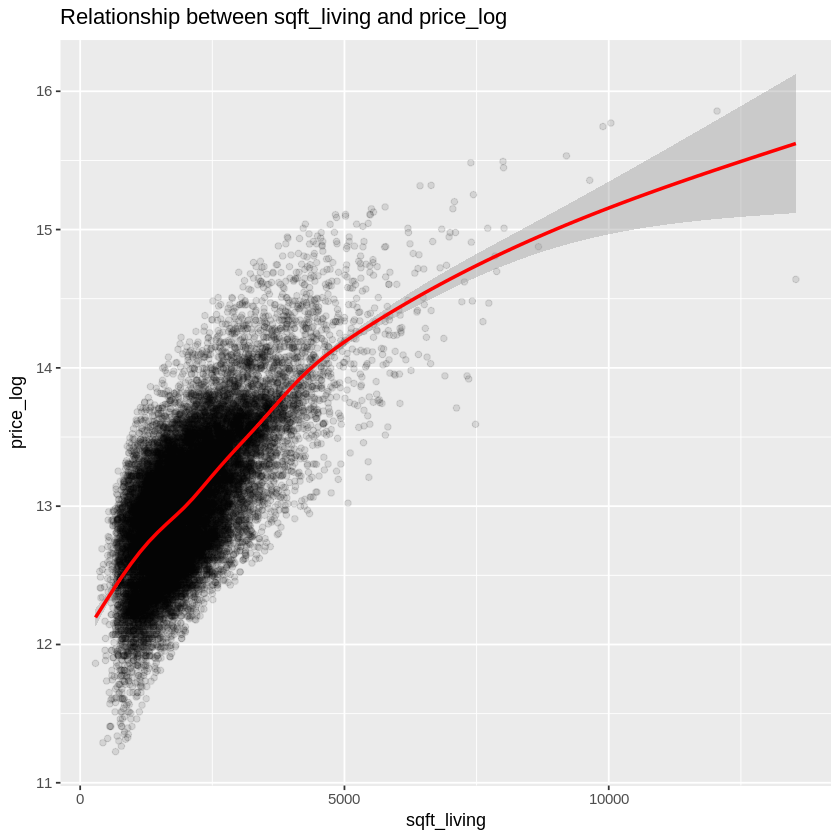

`geom_smooth()` using method = 'gam'


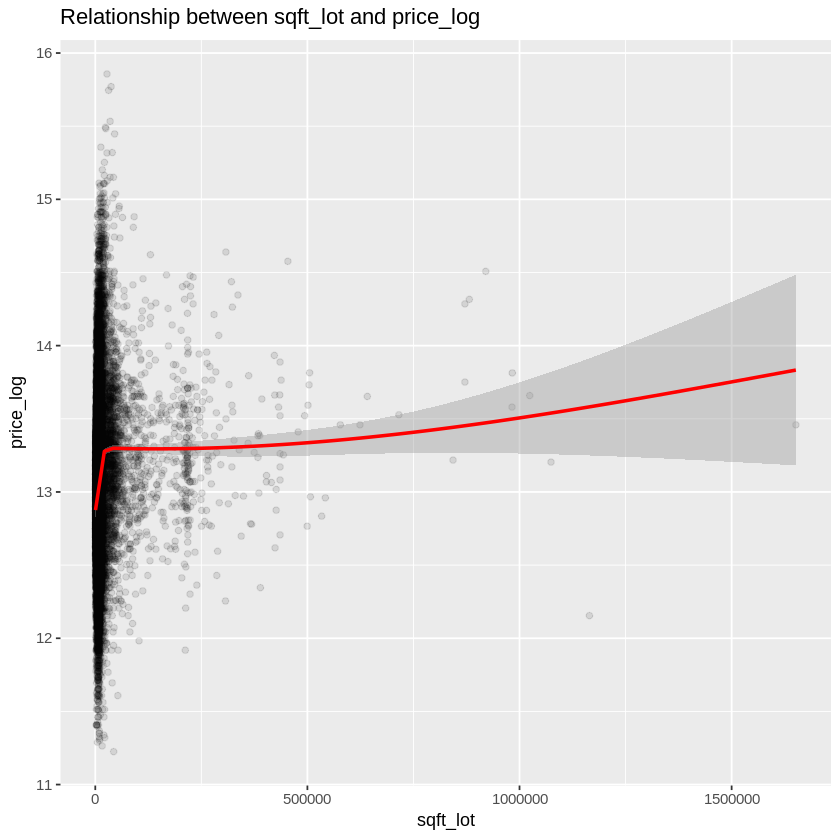

`geom_smooth()` using method = 'gam'


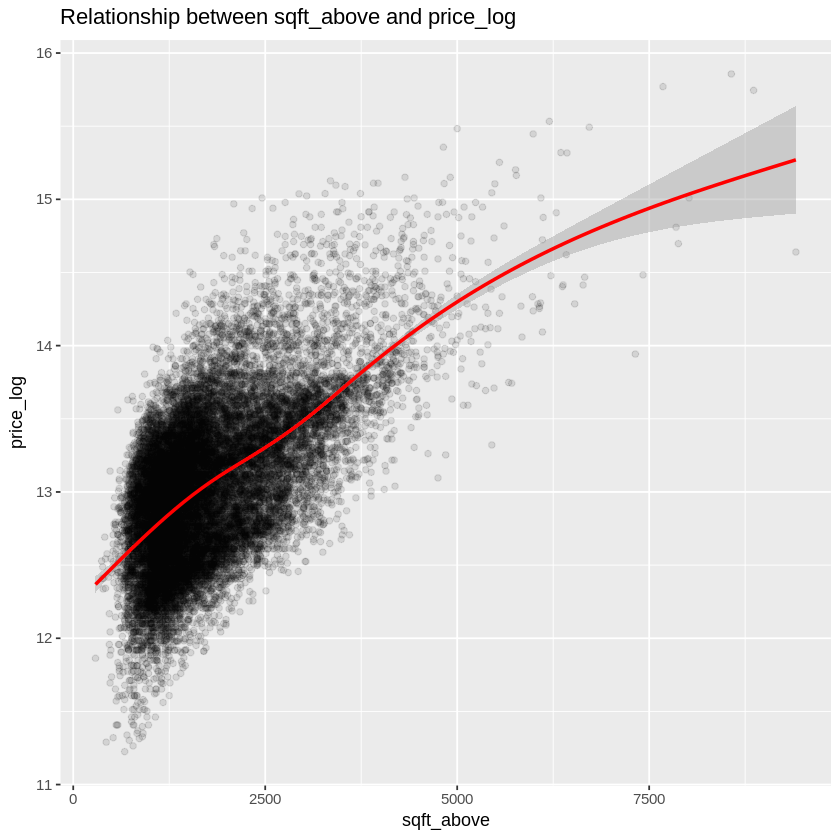

`geom_smooth()` using method = 'gam'


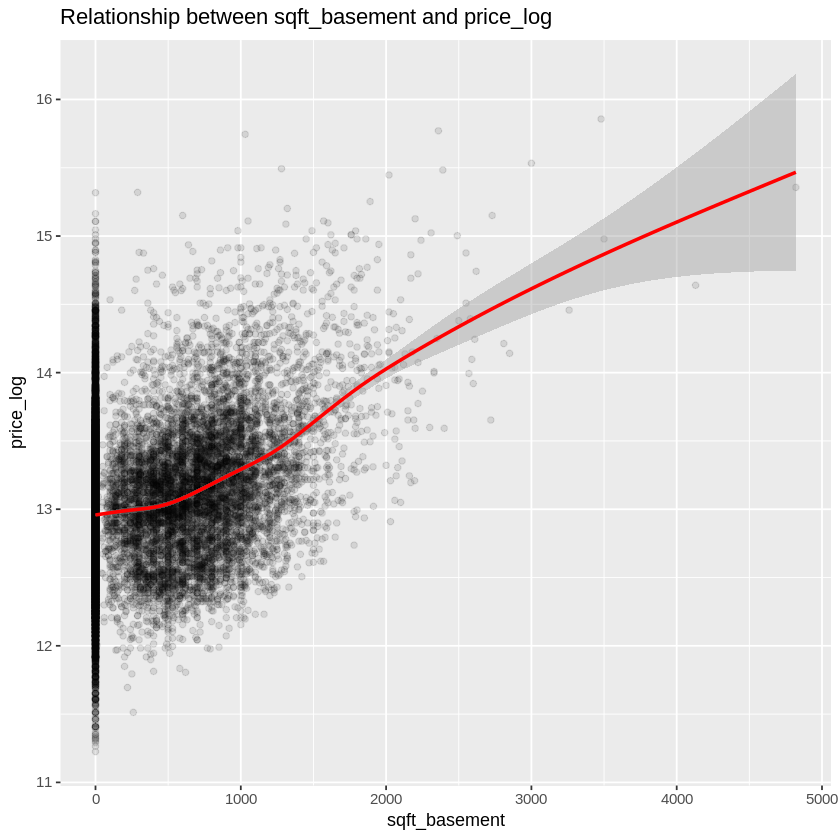

`geom_smooth()` using method = 'gam'


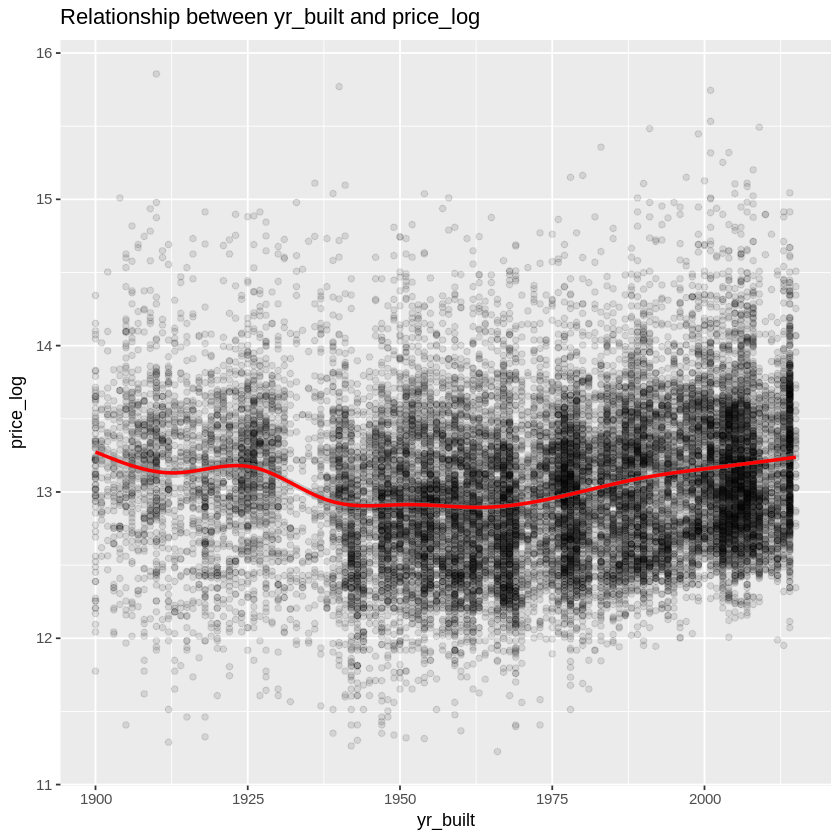

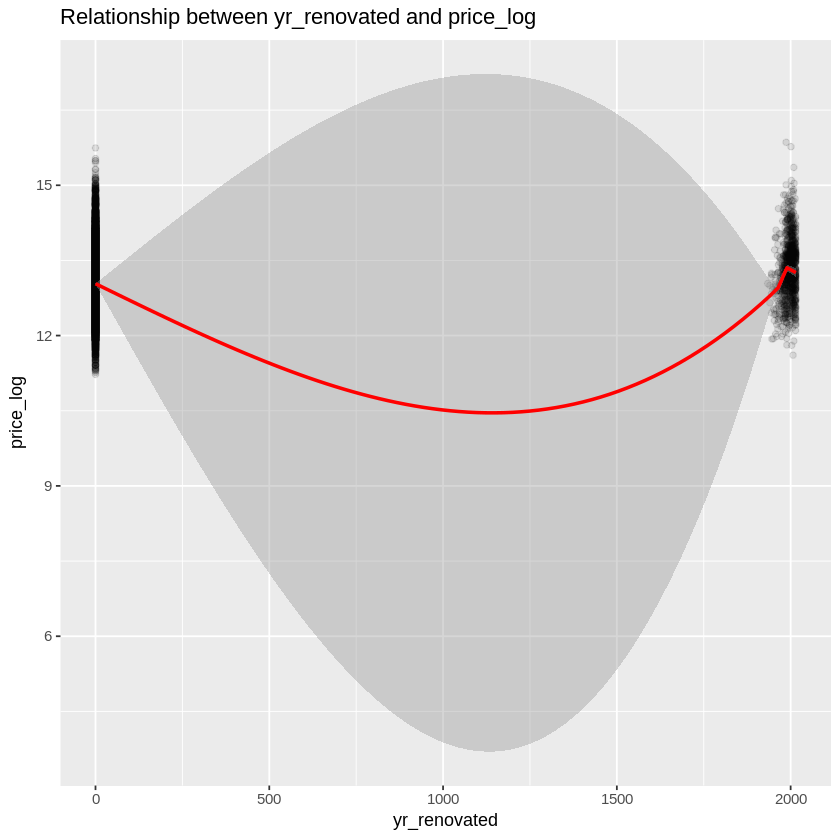

In [6]:
plot_feature = function(col, df){
  p1 = ggplot(df, aes_string(x = col, y = 'price_log')) + 
    geom_point(alpha = 0.1) + 
    geom_smooth(size = 1, color = 'red', method = "auto") + 
    xlab(col) + ylab('price_log') +
    ggtitle(paste('Relationship between', col, 'and price_log'))
  print(p1)
}

# prompt: plot numeric features vs. transformed label
# find numeric features, excluding irrelevant numeric features given in hint
l1 = house %>% select_if(is.numeric) %>% select(-lat, -long, -sqft_living15, -sqft_lot15) %>% names()
# find untransformed, numerical versions of categorical features and labels
l2 = c("price_log", "price", "bedrooms", "bathrooms", "floors", "zipcode", "waterfront", "view", "condition", "grade")
xcols_num = setdiff(l1, l2)
invisible(lapply(xcols_num, plot_feature, house))

<div class="alert alert-block alert-info">Examine these plots and answer the following questions:</div>
Q6. Which two features exhibit essentially no trend with respect to log of price? 

**ANS:** sqft_lot, yr_built exhibit flat trend lines.

Q7. Which features have significant numbers of zeros?  Do you think these zeros might be real values or missing values? 

**ANS:** sqft_basement has significant number of zeros. Could be real values (house does not have basement), but could also be missing values. yr_renovated has significant number of zeros. Could be missing values, but could also be NA (house has not been renovated).

Q8. Which features appear to have a strong trend with log price? Is the behavior of these features similar? 

**ANS:** sqft_living and sqft_above appear to have a strong trend with log price. The behavior is similar, because essentially sqft_living = sqft_above + sqft_basement, and for most rows sqft_above dominates (i.e. sqft_above > sqft_basement).

Next, you will explore the relationship between the label and the categorical features. By categorical features in this case we mean features with named categories or with a small number of discrete numeric values. These features include:

- bedrooms
- bathrooms
- floors
- zipcode
- waterfront
- view_fac
- condition
- grade

In the cell below use ggplot2 create and execute a function to display either box plots, or, ideally, violin plots, of log price stratified by the values of these variables.

**Hint:** Make sure you have created new columns containing these features converted to an R factor type. Else, ggplot2 will not display the stratification correctly.

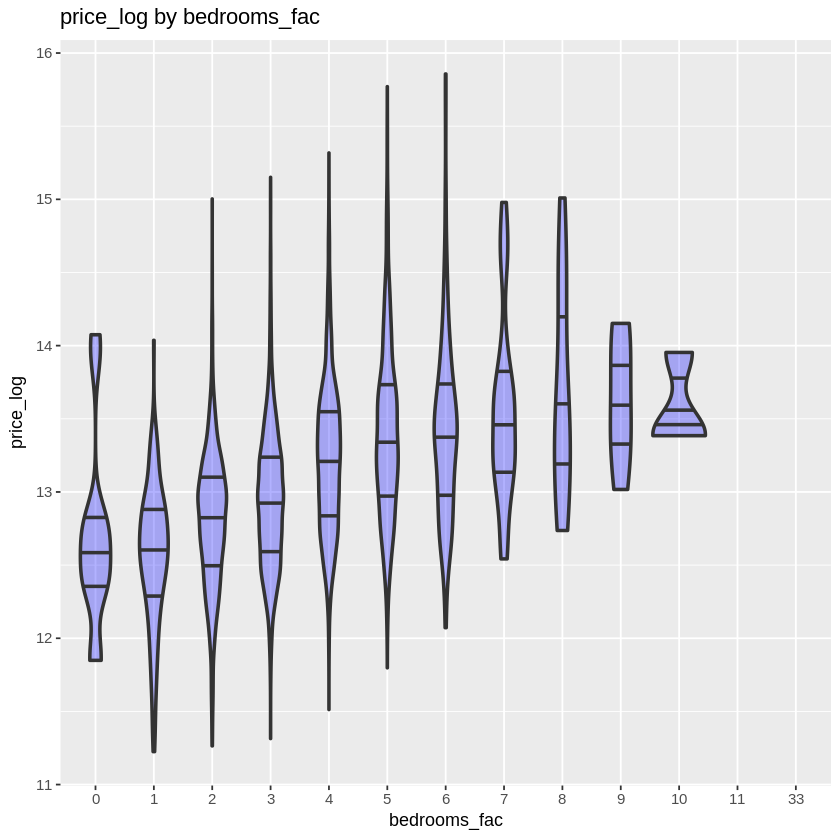

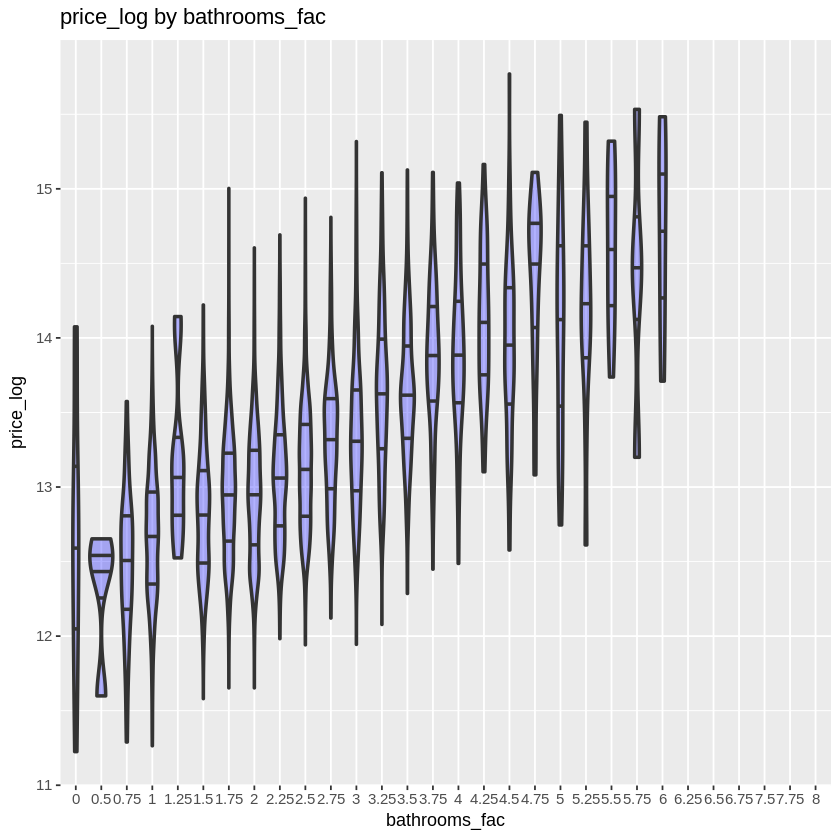

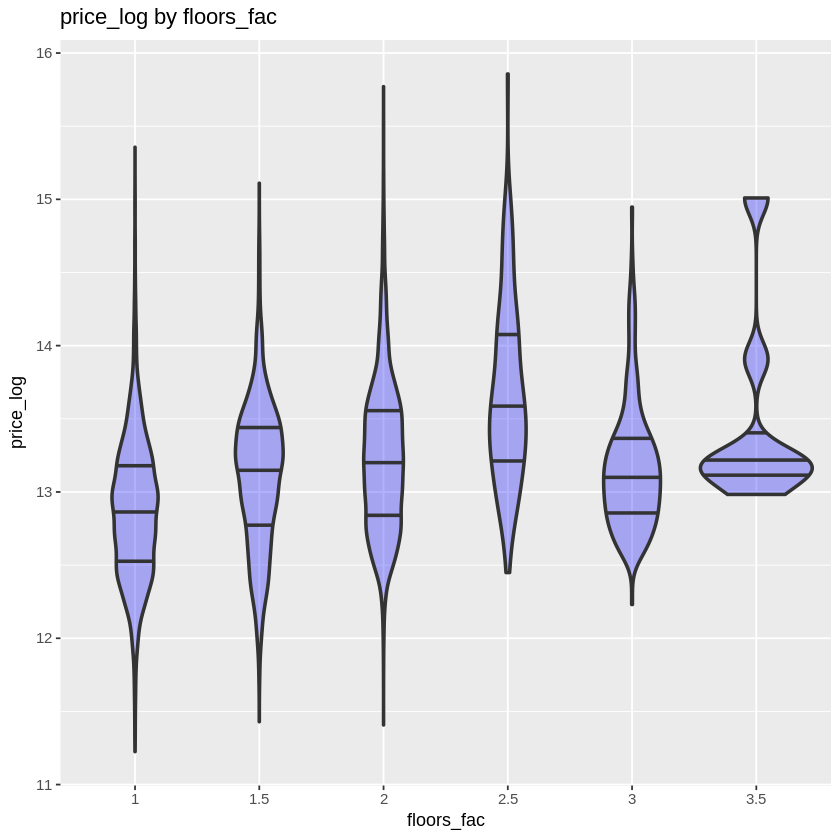

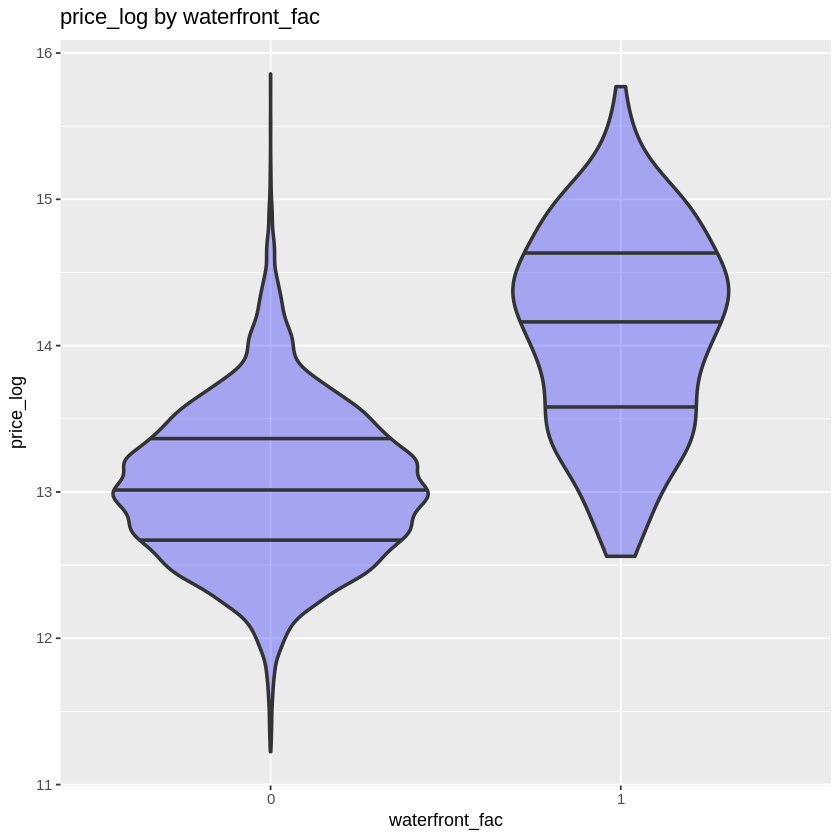

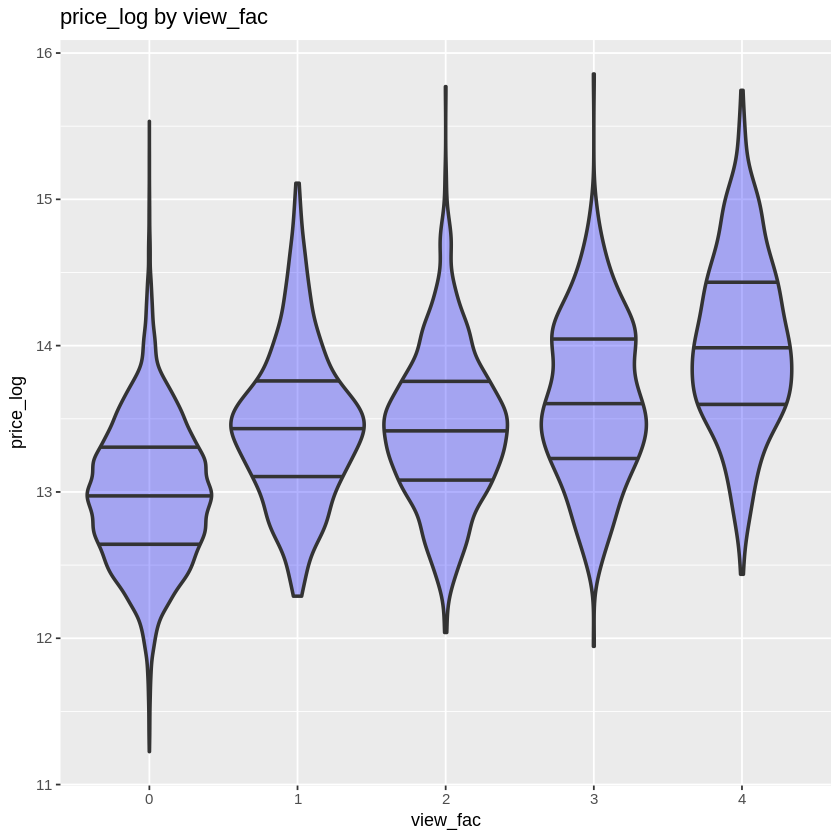

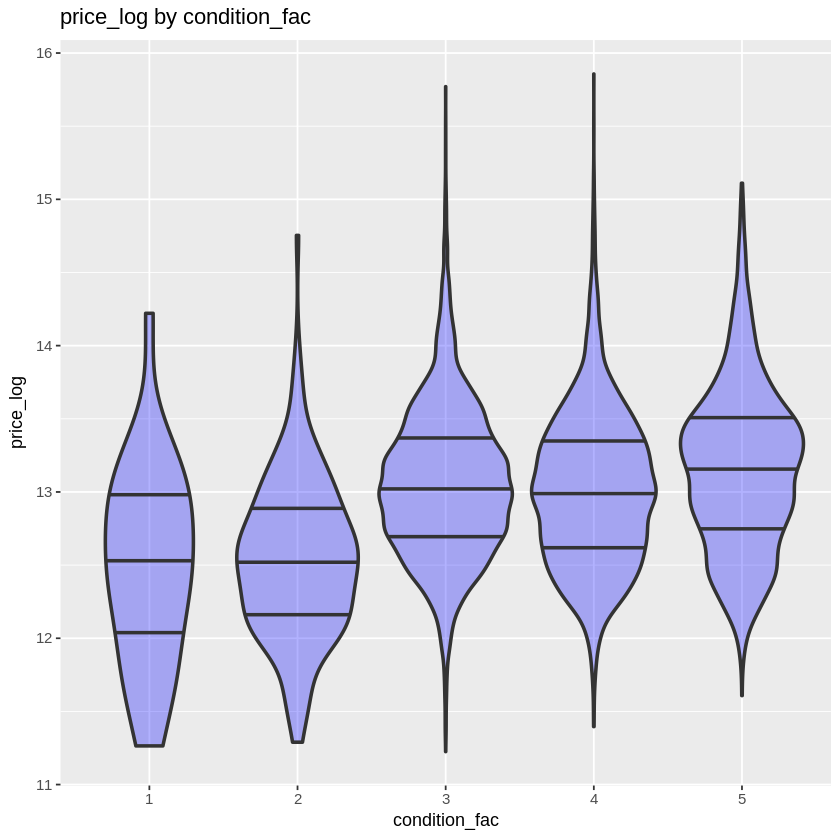

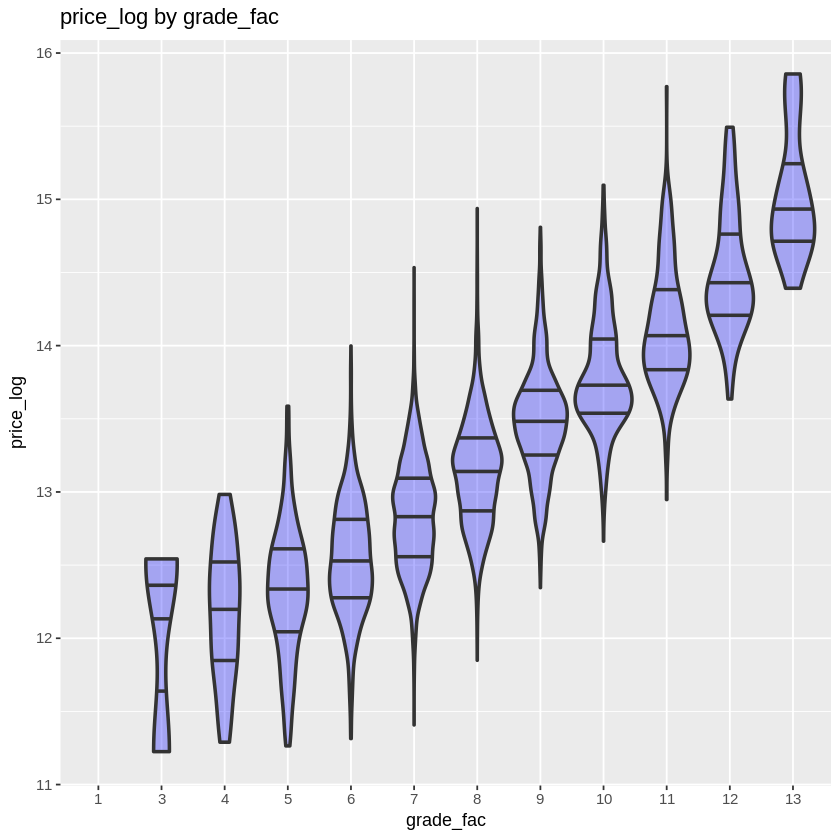

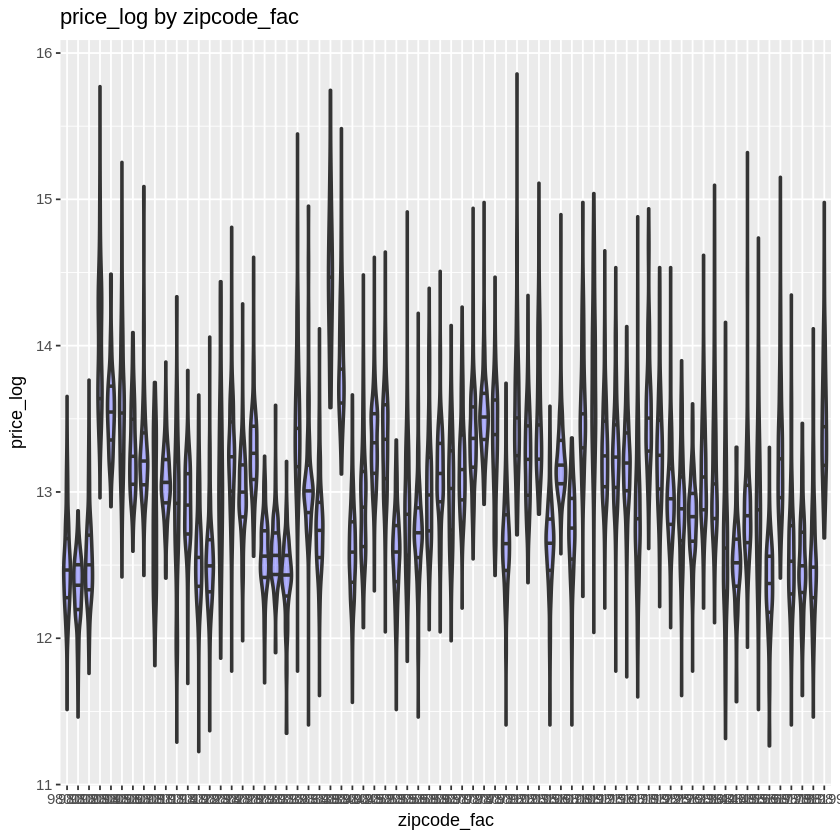

In [7]:
plot_violin = function(col, df){
  p1 = ggplot(df, aes_string(x = col, y = 'price_log')) + 
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), 
                fill = 'blue', alpha = 0.3, size = 1.0) +
    xlab(col) + ylab('price_log') +
    ggtitle(paste('price_log by', col))
  print(p1)
}
xcols_fac = house %>% select_if(is.factor) %>% names()
invisible(lapply(xcols_fac, plot_violin, house))

<div class="alert alert-block alert-info">Examine the plots you have created and answer the following questions:</div>

Q9. Most of these plots show a significant changes in log price as you might expect. For example, waterfront homes cost more than other homes, and homes with greater numbers of bedrooms, bathrooms, or grade, cost more than lesser homes. Excluding zip code, which of these features does not exhibit a clear trend? 

**ANS:** floors (price decreases for floors >=3), condition (price trend appears flat for condition >3).

Q10. How much does location seem to matter in determining the price of homes? Are there significant changes in price with zip code? 

**ANS:** Yes/maybe. Judging from the violin plot, median log price may be greater in some zipcodes compared to others. This will be tested quantitatively in the Summary Statistics section.

There is a potential pit fall in the visual analysis you just performed. It is evident from the forgoing charts that the size of the living area is a significant factor in the price of the house. It might be important to apply a normalization and explore the relationship between log price per square foot and  the features. 

### Relationship to a new variable

In the cell below, use the tidyverse functions to add a new column to your data frame containing log price per square foot, and plot the histogram/density estimate. **Hint:** Use the values of `sqft_living` for this normalization.

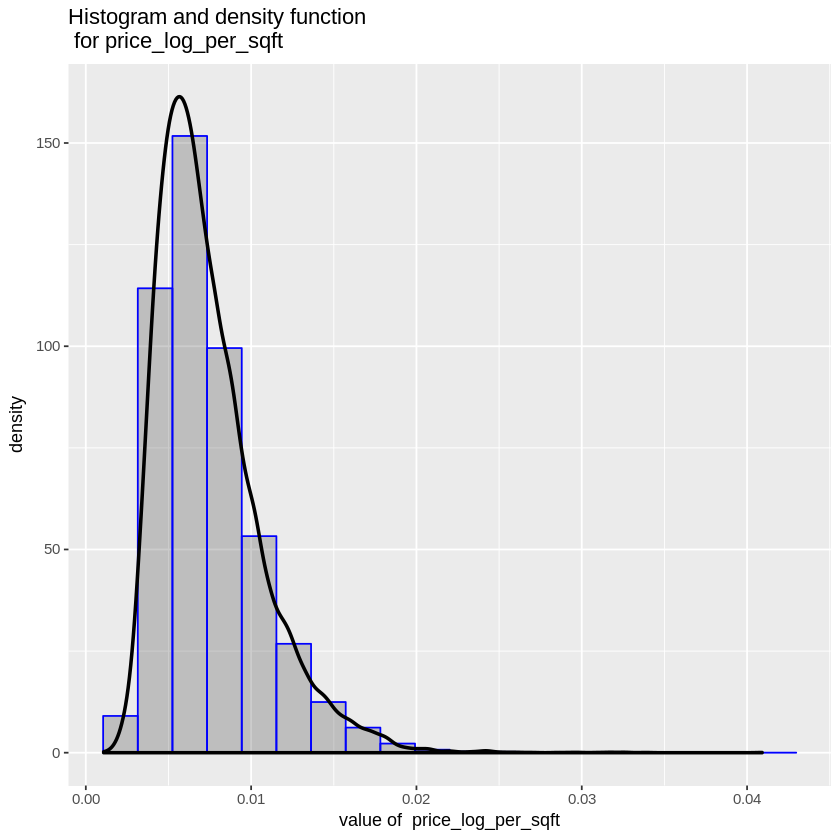

In [8]:
house = house %>% mutate(price_log_per_sqft = price_log/sqft_living)
plot_hist('price_log_per_sqft', house)

<div class="alert alert-block alert-info">Q11. Examine your plot of the new column. Is the distribution symmetric, slightly skewed to the right or slightly skewed to the left?</div>
**ANS:** Distribution is slightly positively-skewed; slightly left skewed per hint in Q1.

Next, you will explore the relationship between this new variable and the other features. 

As a first step you will create and examine charts of log of price per square foot vs. the numeric features. In the code cell below create and execute code to  display these plots. 

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


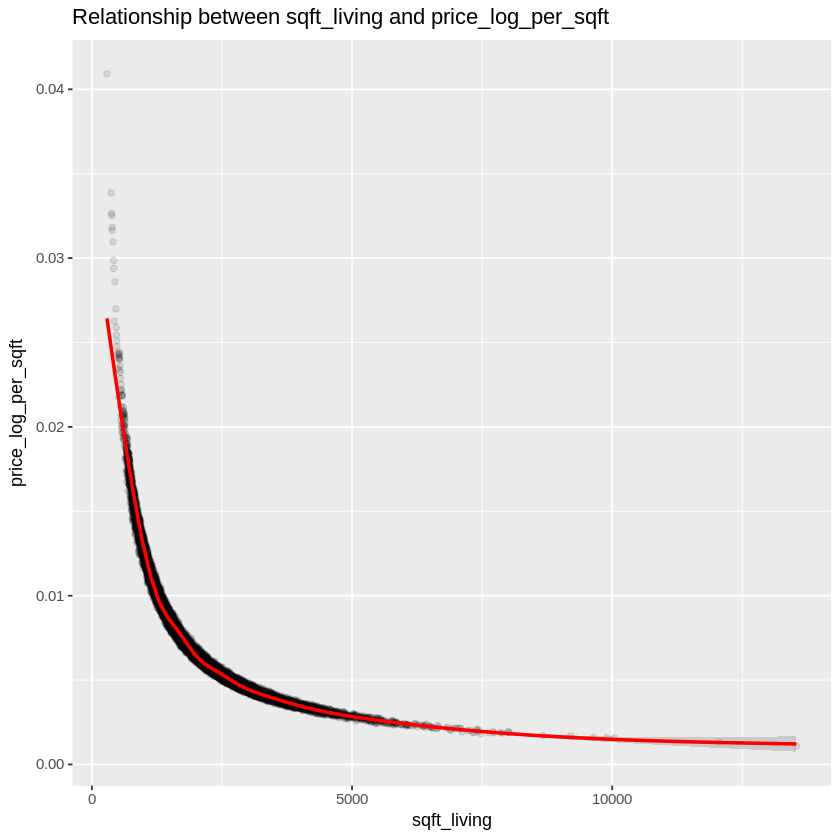

`geom_smooth()` using method = 'gam'


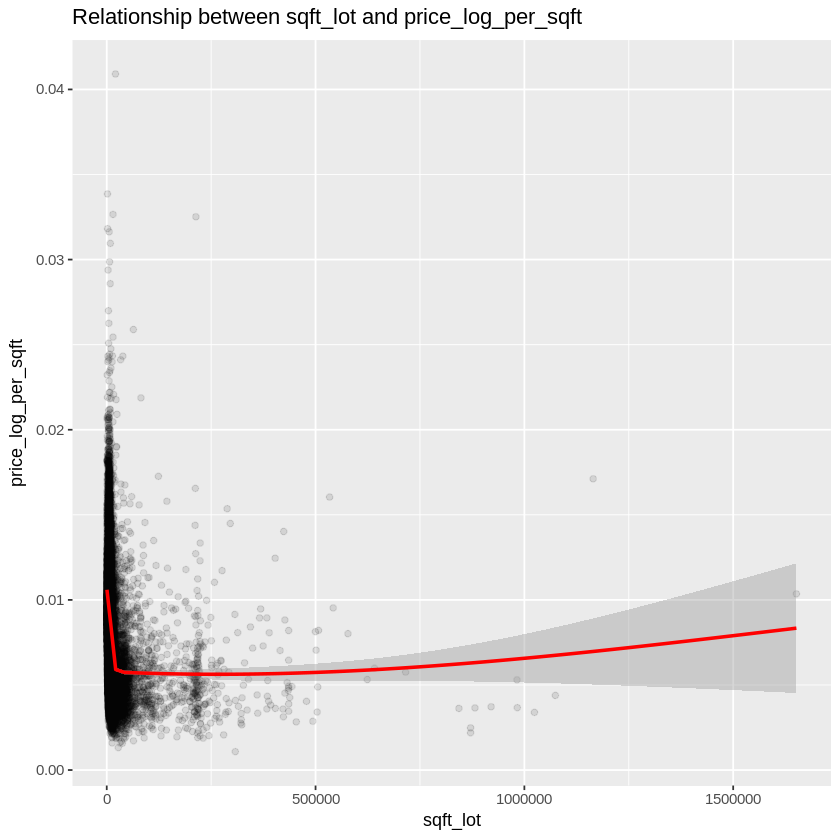

`geom_smooth()` using method = 'gam'


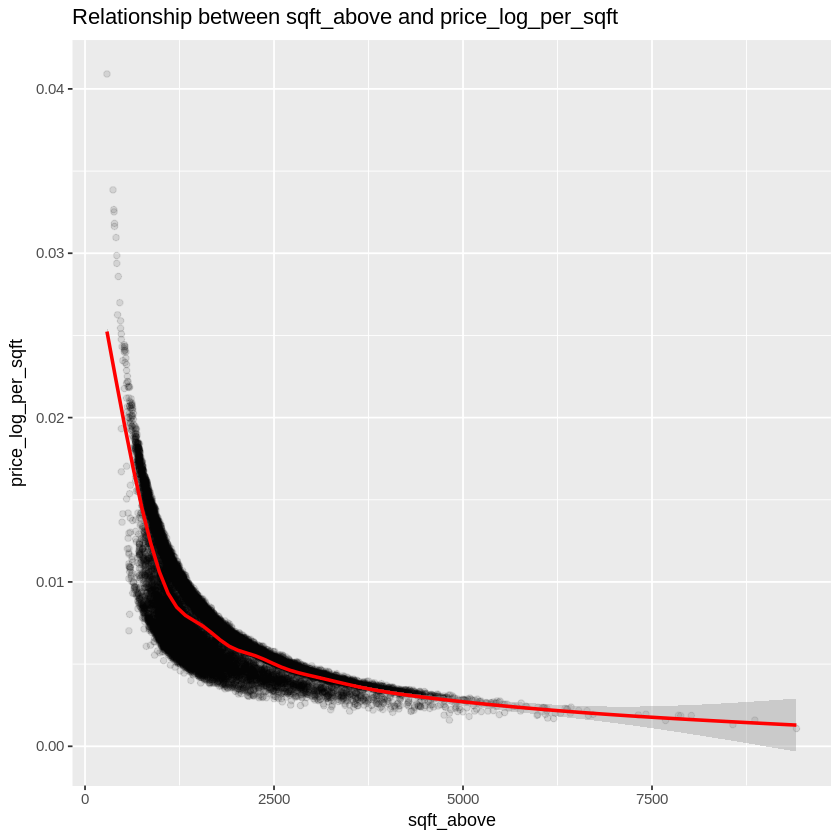

`geom_smooth()` using method = 'gam'


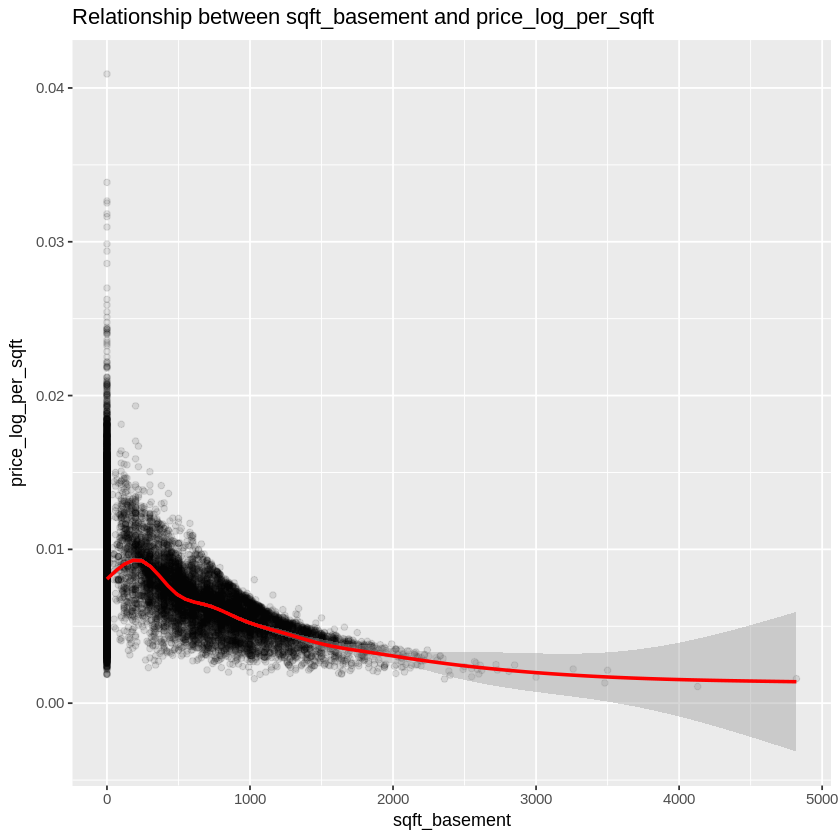

`geom_smooth()` using method = 'gam'


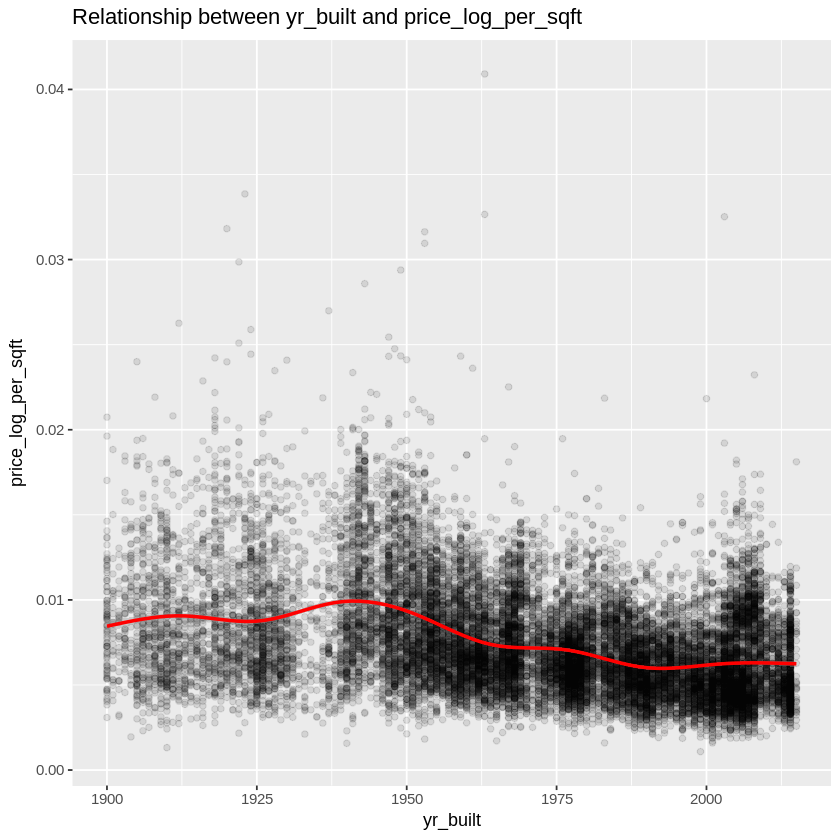

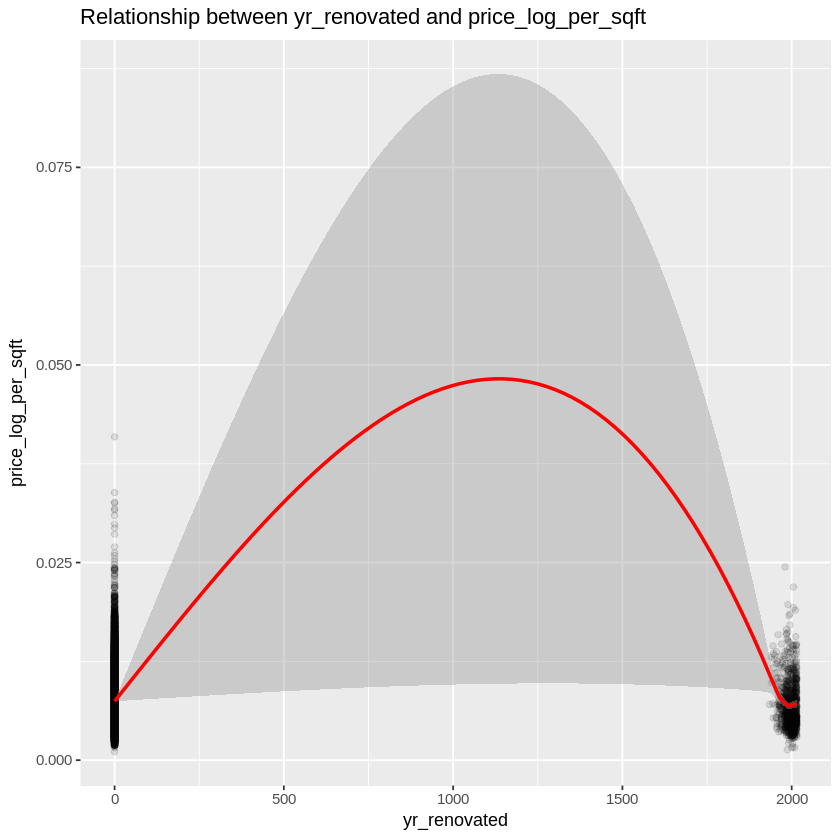

In [9]:
plot_feature2 = function(col, df){
  p1 = ggplot(df, aes_string(x = col, y = 'price_log_per_sqft')) + 
    geom_point(alpha = 0.1) + 
    geom_smooth(size = 1, color = 'red', method = "auto") +
    #geom_smooth(size = 1, color = 'red') + 
    xlab(col) + ylab('price_log_per_sqft') +
    ggtitle(paste('Relationship between', col, 'and price_log_per_sqft'))
  print(p1)
}

invisible(lapply(xcols_num, plot_feature2, house))

<div class="alert alert-block alert-info">Examine these plots and answer the following questions:</div>
Q12. Is there a dependency of log price per square foot with size of the home and if so what? 

**ANS:** The distribution of sqft_living vs. price_log_per_sqft appears to be exponential. price_log_per_sqft decreases as sqft_living increases.

Q13. Does the log price per square foot generally increase of decrease with the age of the home?

**ANS:** yr_built vs. price_log_per_sqft exhibits a relatively flat trend. However, price_log_per_sqft slightly increases with the age of the home (price_log_per_sqft decreases as yr_built increases).

Now, you will examine the relationship between the log price per square foot and the categorical features. In the cell below create and execute code to display these plots.

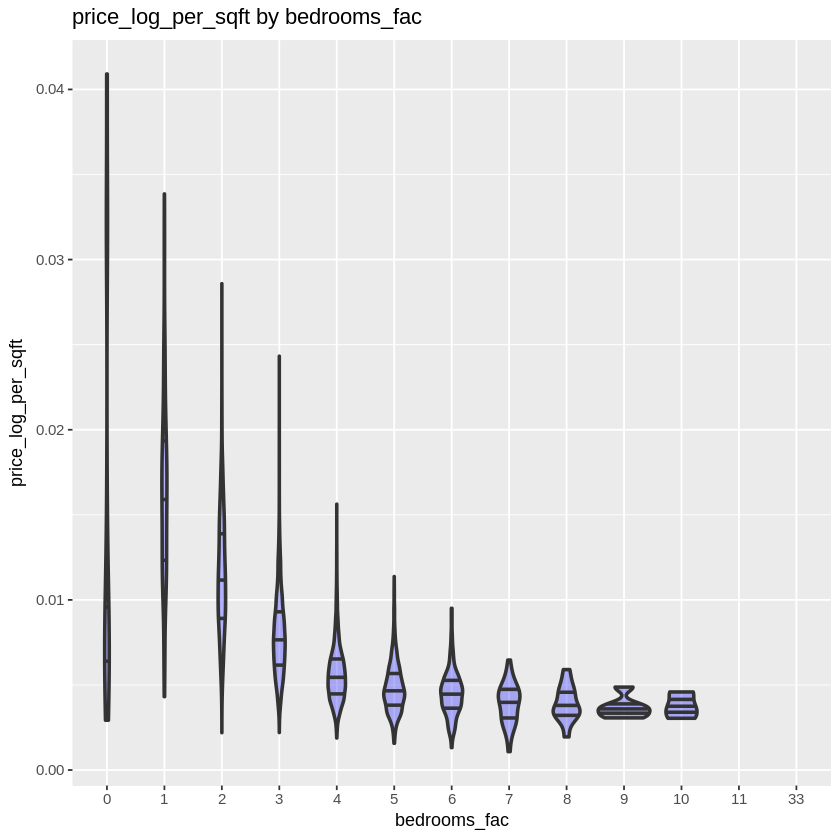

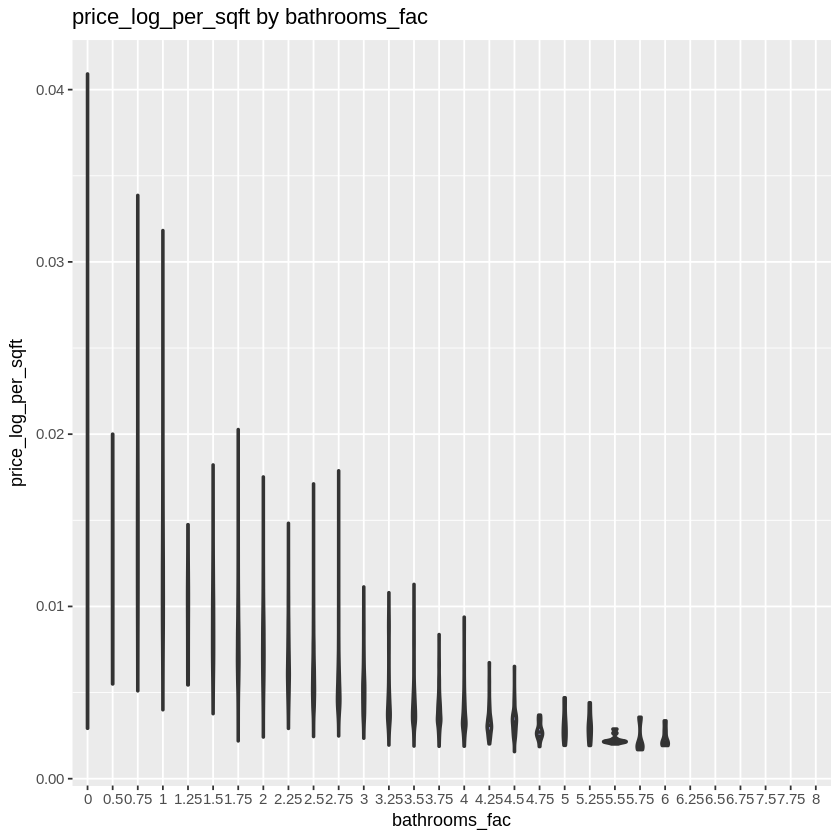

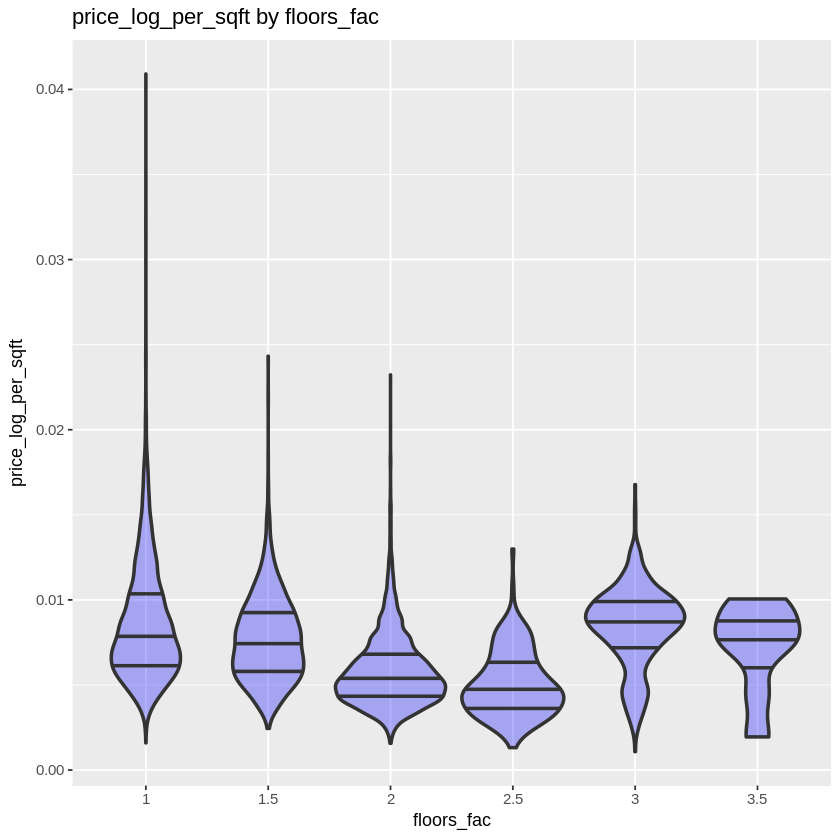

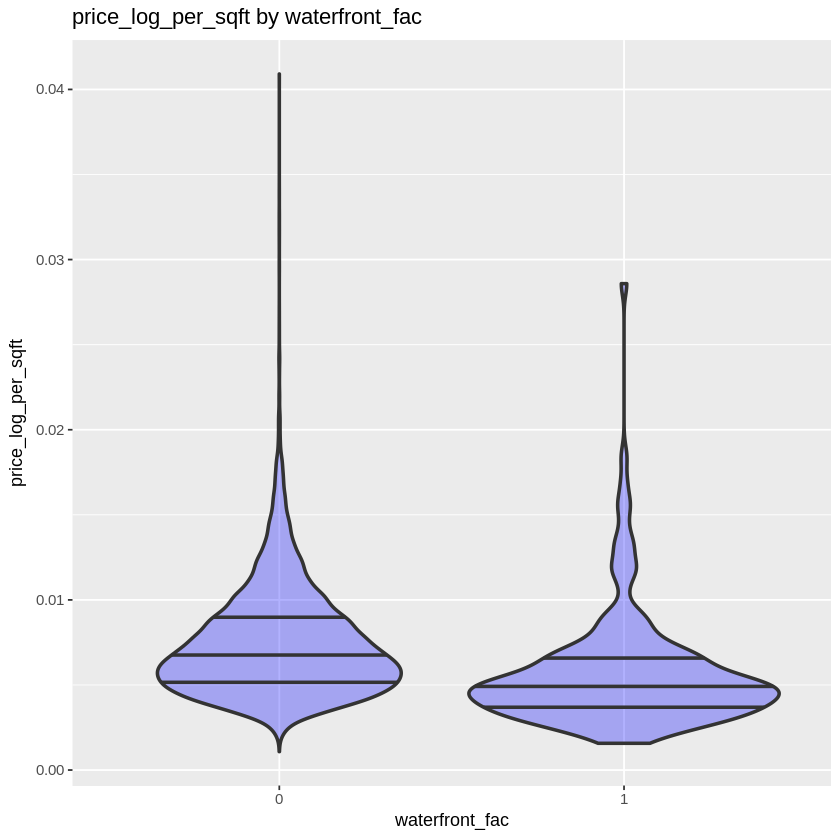

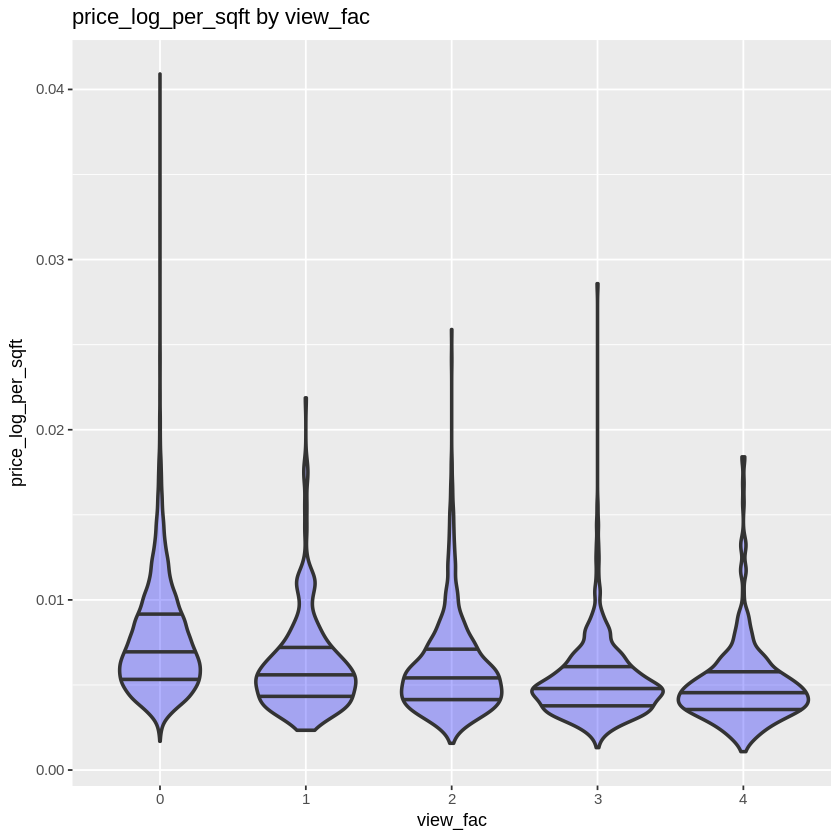

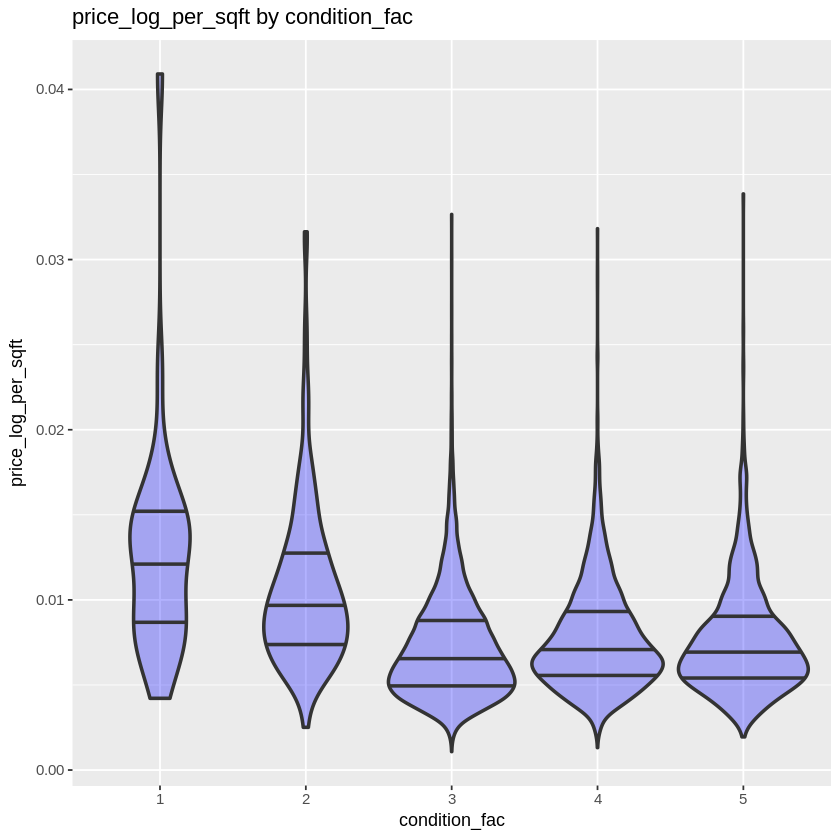

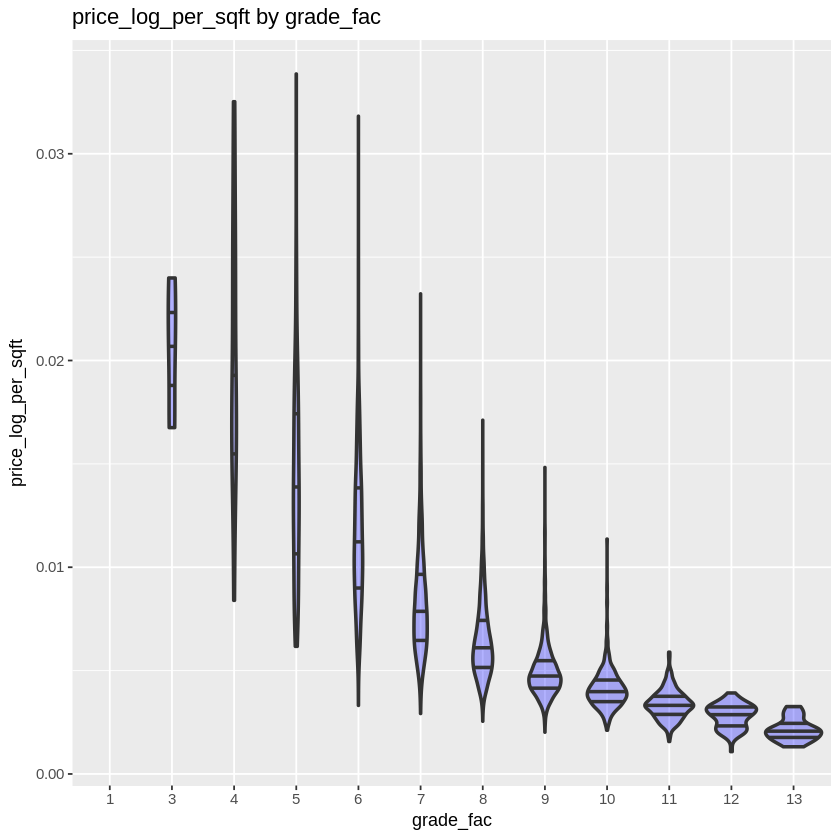

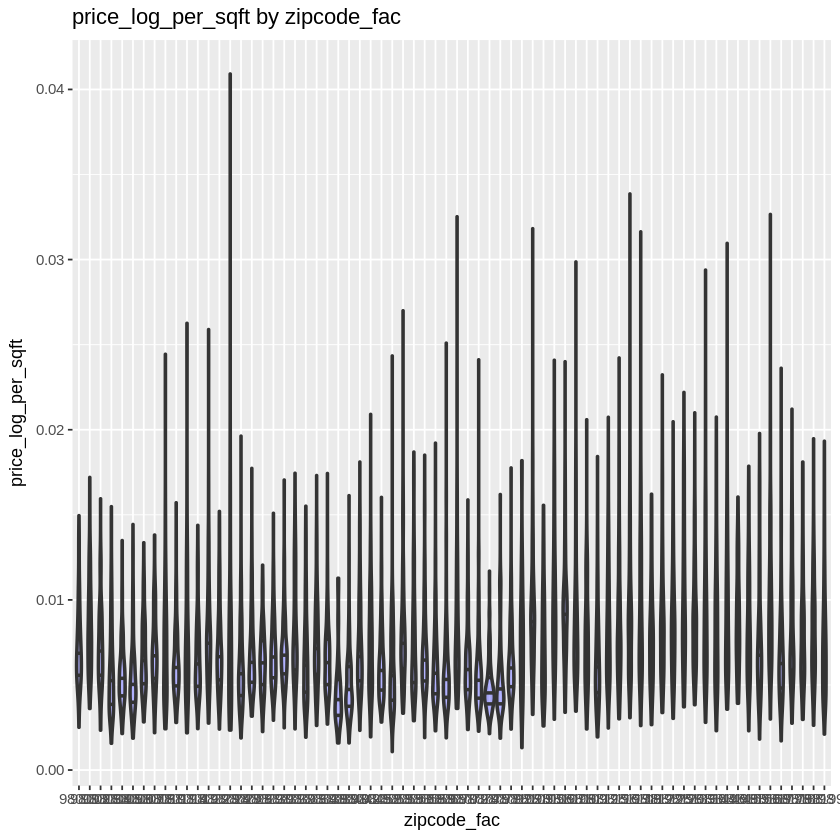

In [10]:
plot_violin2 = function(col, df){
  p1 = ggplot(df, aes_string(x = col, y = 'price_log_per_sqft')) + 
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), 
                fill = 'blue', alpha = 0.3, size = 1.0) +
    xlab(col) + ylab('price_log_per_sqft') +
    ggtitle(paste('price_log_per_sqft by', col))
  print(p1)
}
invisible(lapply(xcols_fac, plot_violin2, house))

<div class="alert alert-block alert-info">Examine these plots and answer the following questions:</div>
Q14. Which two features show the most consistent difference or trend with the log price per square foot? 

**ANS:** grade, bedrooms show the most consistent trend.

Q15. Are there noticeable differences in log price per square foot between different zip code areas? 

**ANS:** Yes/maybe. Judging from the violin plot, median log price may be greater in some zipcodes compared to others. This will be tested quantitatively in the Summary Statistics section.

### Another variable transformation

Review the plots you made of the log of price vs. `sqft_living`. Notice that the trend is not perfectly straight. Further, recall that the histogram of `sqft_living` was quite asymmetric. Is it possible to improve this situation with some kind of transformation? 

In the cell below try the following:
1. Use dplyr to compute the square root and log of `sqft_living`, and add these new features to your data frame.
2. Plot the histogram and/or density function of these new features. 

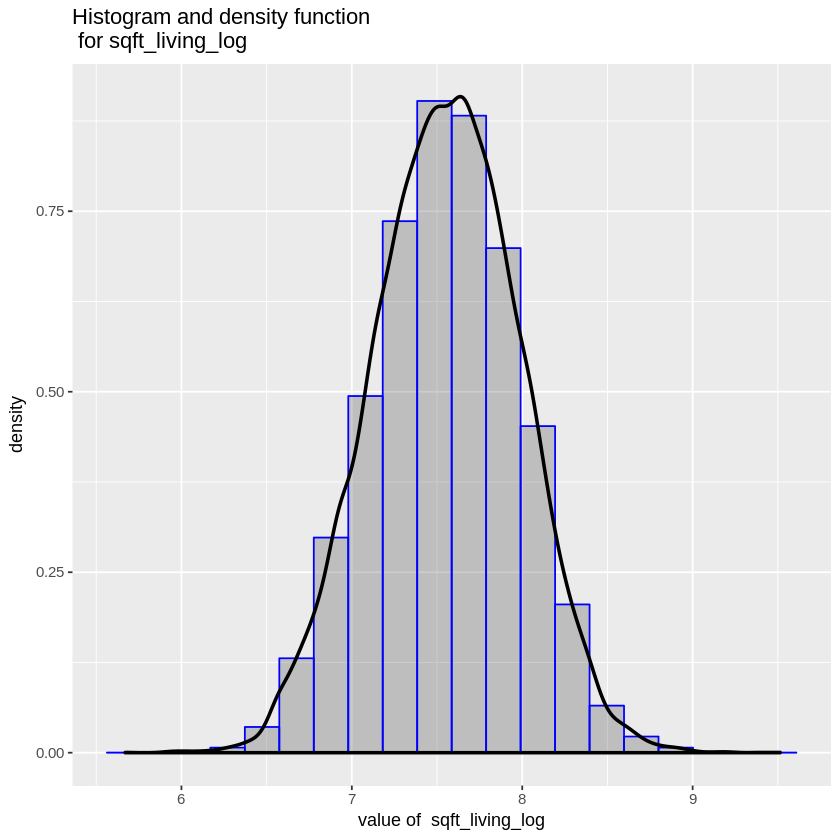

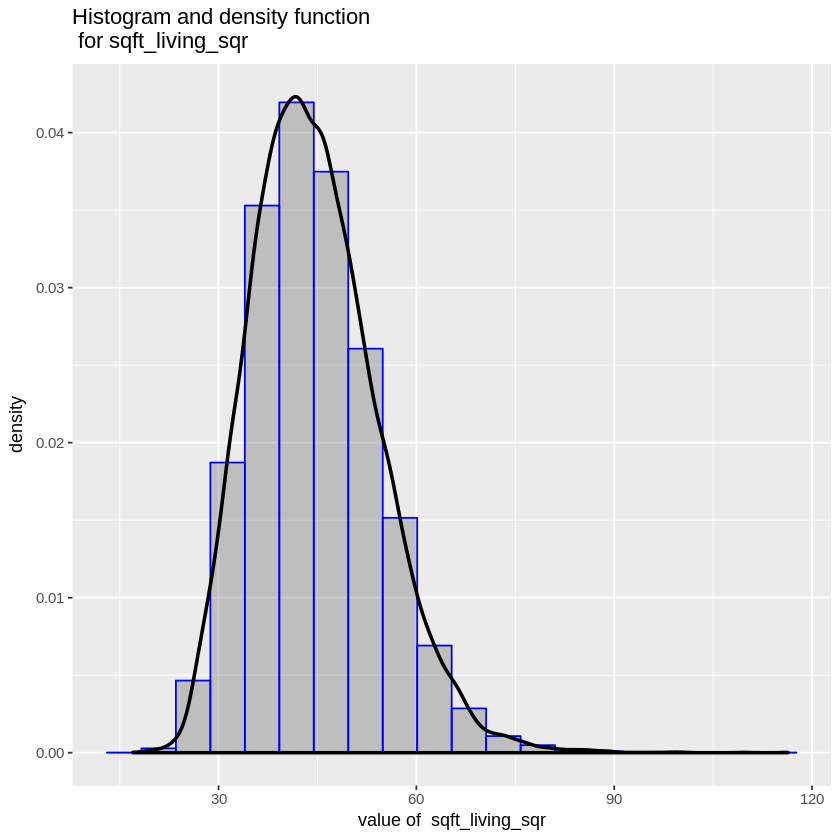

In [11]:
house = house %>% mutate(sqft_living_log = log(sqft_living), sqft_living_sqr = sqrt(sqft_living))
cols = c("sqft_living_log", "sqft_living_sqr")
invisible(lapply(cols, plot_hist, house))

<div class="alert alert-block alert-info">Q16. Which of the histograms and/or density functions for the transformed feature is more symmetric?   </div>
**ANS:** log version (sqft_living_log) is more symmetric.

A remaining question is if the relationship between the square root of living area and log price is noticeably different, when compared to the relationship living area and log price. To answer this question, use ggplot2, to plot a scatter plot or hexbin plot of square root of living area vs. log price. Be sure to include a smoother trend line in your plot.

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


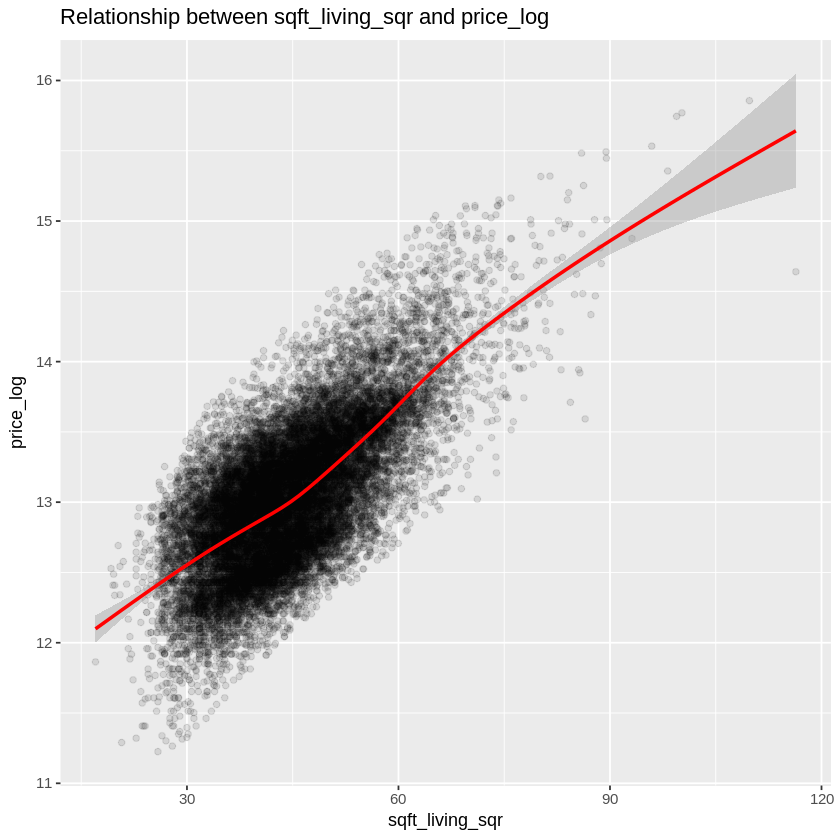

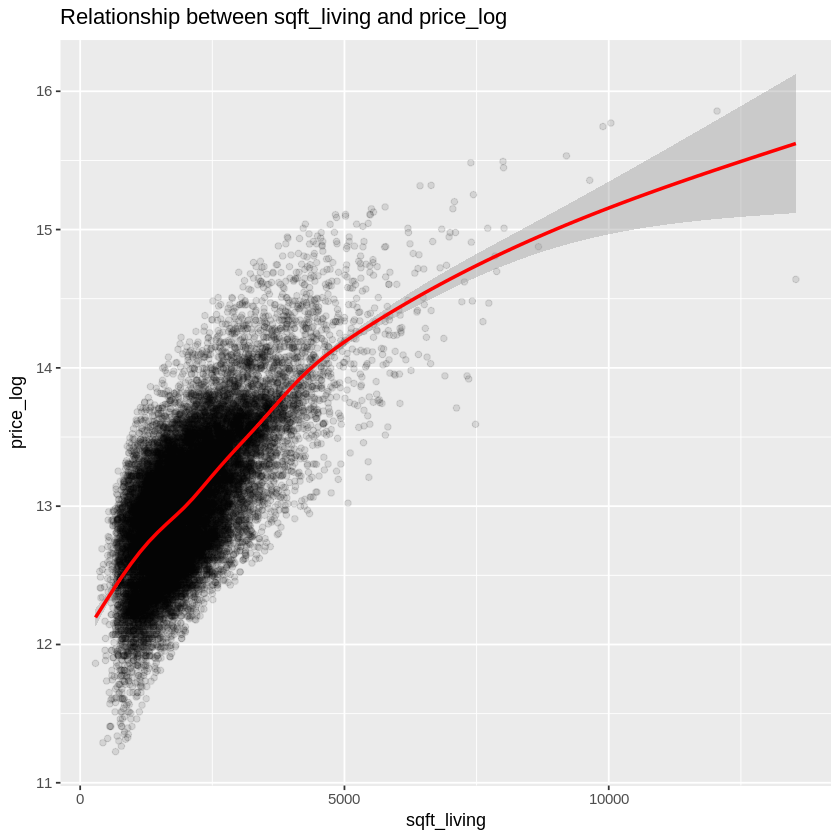

In [12]:
plot_feature("sqft_living_sqr", house)
plot_feature("sqft_living", house)

<div class="alert alert-block alert-info">Q17. Examine your plot(s). Is the shape of the smoothed trend line different from the plot of  living area vs. log price? </div>
**ANS:** Yes, the shape of the trend line is different. For sqft_living_sqr vs. price_log the trend line appears more linear, in particular as sqft_living increases.

## Summary Statistics

Now that you have visually explored the data set, you will now use summary statistical methods to explore the relationships in the data. With the visualizations you have already seen a number of relationships with apparently significant differences in the prices of homes. In this section, you will investigate the significance of some of these differences.

### Two population tests

As a first step you will investigate the significance in the differences in prices between waterfront homes and non-waterfront homes. The plots you created earlier showed that there was a noticeable price difference between waterfront and non-waterfront homes. The starting point is to confirm the apparent price difference is indeed significant. 

In the code cell below, create and execute the code to compute and display the results of a two sample t-test. **Hint** Use dplyr to create data frames for waterfront homes and non-waterfront homes. 

In [13]:
house_wf = house %>% filter(waterfront_fac == 1) 
house_nwf = house %>% filter(waterfront_fac == 0) 
t.test(house_wf$price, house_nwf$price)
t.test(house_wf$price_log, house_nwf$price_log)


	Welch Two Sample t-test

data:  house_wf$price and house_nwf$price
t = 12.876, df = 162.23, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  956963.3 1303661.6
sample estimates:
mean of x mean of y 
1661876.0  531563.6 



	Welch Two Sample t-test

data:  house_wf$price_log and house_nwf$price_log
t = 19.718, df = 163.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.9563836 1.1692488
sample estimates:
mean of x mean of y 
 14.10262  13.03980 


<div class="alert alert-block alert-info">Q18. Examine the results of your t-test. Can you reject the null hypothesis that the *difference between the price of waterfront and non-waterfront* homes is not significant, and why? </div>
**ANS:** Yes. p<2.2e-16 (p<0.05); reject H0.

Whatever price difference there might be between waterfront and non-waterfront homes could arise from a difference in the value of the property per square foot of living space. The charts you created earlier seemed to indicate that this was the case. 

In the cell below create and execute the code to preform and display the results of a t-test of the log price per square foot for waterfront vs. non-waterfront homes. **Hint:** Since we suspect that waterfront property has a higher log price from square foot, use the argument `alternative = "greater"` for the `t.test` function. Make sure the values of log price per square foot of waterfront homes is the first argument. 

In [14]:
t.test(house_wf$price_log_per_sqft, house_nwf$price_log_per_sqft, alternative = "greater")


	Welch Two Sample t-test

data:  house_wf$price_log_per_sqft and house_nwf$price_log_per_sqft
t = -6.3066, df = 164, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.002177728          Inf
sample estimates:
  mean of x   mean of y 
0.005719521 0.007444734 


<div class="alert alert-block alert-info">Q19. Examine the results of your t-test. Can you reject the null hypothesis that the *log price per square foot* for waterfront homes is less than or equal to than non-waterfront homes? </div>
**ANS:** No. p=1 (p>0.05). 

It is also possible that waterfront homes are simply larger than non-waterfront homes. In the cell below create and execute the code to preform and display the results of a t-test of the square foot of living space for waterfront vs. non-waterfront homes.

In [15]:
print("H0: mean(waterfront) = mean(non-waterfront)")
t.test(house_wf$sqft_living_sqr, house_nwf$sqft_living_sqr)
print("H0: mean(waterfront) <= mean(non-waterfront)")
t.test(house_wf$sqft_living_sqr, house_nwf$sqft_living_sqr, alternative = "greater")
print("H0: mean(waterfront) >= mean(non-waterfront)")
t.test(house_wf$sqft_living_sqr, house_nwf$sqft_living_sqr, alternative = "less")

[1] "H0: mean(waterfront) = mean(non-waterfront)"



	Welch Two Sample t-test

data:  house_wf$sqft_living_sqr and house_nwf$sqft_living_sqr
t = 9.4082, df = 163.17, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  8.003253 12.255087
sample estimates:
mean of x mean of y 
 54.64966  44.52049 


[1] "H0: mean(waterfront) <= mean(non-waterfront)"



	Welch Two Sample t-test

data:  house_wf$sqft_living_sqr and house_nwf$sqft_living_sqr
t = 9.4082, df = 163.17, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 8.348165      Inf
sample estimates:
mean of x mean of y 
 54.64966  44.52049 


[1] "H0: mean(waterfront) >= mean(non-waterfront)"



	Welch Two Sample t-test

data:  house_wf$sqft_living_sqr and house_nwf$sqft_living_sqr
t = 9.4082, df = 163.17, p-value = 1
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 11.91018
sample estimates:
mean of x mean of y 
 54.64966  44.52049 


<div class="alert alert-block alert-info">Q20. Examine the results of your t-test. Can you reject the null hypothesis that the *size* of waterfront homes is greater than or equal to non-waterfront homes?   </div>
**ANS:** To test if "waterfront homes are simply larger than non-waterfront homes" as stated in the prompt above the code block, H0: mean(waterfront) <= mean(non-waterfront), argument = "greater", result: p less than 0.05, reject H0. 
<br>To test "the null hypothesis that the *size* of waterfront homes is greater than or equal to non-waterfront homes" as stated in the question, argument = "less", result: p=1, fail to reject H0.

### Grouped aggregations and summaries

You have investigated some simple relationships between waterfront homes and non-waterfront homes. Now, you will investigate the effects of location. In particular, you will investigate the effect of zip code area on the prices and characteristics of homes.  

As a first step you will create and execute code to perform the following operations using a dplyr verb chain:
1. Group the table by the zip code.
2. For each group, compute the following summary statistics for the homes in the groups
  - Number (count)
  - Mean log price
  - Median log price
  - Standard deviation of the log of price
  - Mean log price per square foot 
  - Median log price per square foot
  - Standard deviation of log price per square foot
3. Sort the groups by mean price
  
Print and examine the resulting summary tables for the 10 rows of the most and least expensive mean price zip codes. 

In [16]:
# most and least expensive mean price zip codes
house_grouped = house %>% group_by(zipcode_fac) %>%
  summarize(count = n(),
            mean_price_log = mean(price_log),
            med_price_log = median(price_log),
            sd_price_log = sd(price_log),
            mean_price_log_per_sqft = mean(price_log_per_sqft),
            median_price_log_per_sqft = median(price_log_per_sqft),
            sd_price_log_per_sqft = sd(price_log_per_sqft)) %>%
  arrange(mean_price_log %>% desc())

head(house_grouped, 10)
tail(house_grouped, 10)

zipcode_fac count mean_price_log med_price_log sd_price_log
1  98039        50   14.47003       14.45339      0.4745788   
2  98004       317   14.00838       13.95527      0.4537474   
3  98040       282   13.90256       13.80924      0.4012818   
4  98112       269   13.77928       13.72668      0.4988403   
5  98109       109   13.58536       13.50899      0.4403891   
6  98102       105   13.56355       13.48701      0.4748035   
7  98006       498   13.56241       13.54132      0.4360199   
8  98005       168   13.56010       13.54824      0.2904471   
9  98119       184   13.55992       13.52108      0.4057914   
10 98105       229   13.55873       13.42247      0.4396038   
   mean_price_log_per_sqft median_price_log_per_sqft sd_price_log_per_sqft
1  0.004619762             0.004095718               0.002207712          
2  0.005803822             0.005188333               0.002565797          
3  0.005095695             0.004603736               0.001917537          
4  0.006589108             0.006036937               0.002825984          
5  0.007717609             0.007274309               0.002946247          
6  0.007928223             0.007596407               0.003514541          
7  0.005440187             0.005010151               0.002143975          
8  0.005672386             0.005425866               0.001878704          
9  0.007784481             0.007465668               0.002836883          
10 0.007460592             0.007015950               0.002934126

zipcode_fac count mean_price_log med_price_log sd_price_log
1  98178       262   12.55938       12.53637      0.3927232   
2  98003       280   12.53986       12.49678      0.3086117   
3  98198       280   12.53205       12.48749      0.3981400   
4  98188       136   12.51861       12.48370      0.3312261   
5  98148        57   12.51399       12.53538      0.3082471   
6  98023       499   12.51242       12.50042      0.3174986   
7  98001       362   12.49135       12.46844      0.3238185   
8  98032       125   12.39819       12.42521      0.2824866   
9  98168       269   12.34447       12.36734      0.3128324   
10 98002       199   12.33770       12.36734      0.2377800   
   mean_price_log_per_sqft median_price_log_per_sqft sd_price_log_per_sqft
1  0.008529237             0.007329120               0.003509353          
2  0.007267825             0.006988669               0.002296011          
3  0.008202592             0.007720443               0.002880797          
4  0.008098649             0.007413619               0.003243737          
5  0.008709871             0.007958343               0.002843584          
6  0.007098695             0.006656148               0.002465233          
7  0.007302604             0.006812732               0.002360507          
8  0.008163736             0.007187458               0.003002280          
9  0.009638933             0.008909360               0.003729826          
10 0.008394796             0.007878731               0.002657082

<div class="alert alert-block alert-info">Examine and compare the tables of the highest average price and lowest average price of homes zip code areas. Answer the following questions:</div>
Q21.	Do any of the mean or median log prices for the lowest and highest priced zip code areas overlap? 

**ANS:** No. min(mean, highest) = 13.56 > max(mean, lowest) = 12.56; min(median, highest) = 13.42 > max(median, lowest) = 12.54.

Q22.	Do any of the mean or median log prices per square foot for the lowest and highest priced zip code areas overlap? 

**ANS:** Yes, there is overlap. 

Q23.	Do the standard deviations of the mean log price and mean log price per square foot indicate a distribution with high or lot dispersion for each zip code? What does this indicate in terms of how similar home prices are within zip code areas? 

**ANS:** High and low standard deviation indicate high and low dispersion, respectively, within zip code areas. The coefficient of variation = sd/mean could be computed to compare dispersion for different zipcodes.


Next, you will determine which features might be significant in determining the differences in prices of homes by zip code area. 
Use a t-test to determine if the differences in log prices per square foot are significant between the 10 highest and 10 lowest zip code areas. The log price per square foot is used since the visualization revealed that this transformed feature was closer to a Normal distribution that the price per square foot. 
**Hints:** You can perform the required processing as follows:
1.	Use the head and tail functions to find the 10 zip codes for the highest and lowest priced areas.
2.	Filter the data set for two subsets; one for high priced and low priced areas. The goal is to find all the rows in each of the zip code areas, so you can reference the values needed for the t-tests.
3.	Use the appropriate column from the two subsets as the data for the t.test function. 
4.	Since we suspect that high priced areas have higher log prices per square foot, use the alternative = "greater" argument for `t.test.
 prices are within zip code areas?


In [17]:
highzip = head(house_grouped,10)$zipcode_fac
lowzip = tail(house_grouped,10)$zipcode_fac

house_highzip = filter(house, house$zipcode_fac %in% highzip)
house_lowzip = filter(house, house$zipcode_fac %in% lowzip)

t.test(house_highzip$price_log_per_sqft, house_lowzip$price_log_per_sqft, alternative = "greater")


	Welch Two Sample t-test

data:  house_highzip$price_log_per_sqft and house_lowzip$price_log_per_sqft
t = -20.818, df = 4675.8, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.001866878          Inf
sample estimates:
  mean of x   mean of y 
0.006222041 0.007952188 


<div class="alert alert-block alert-info">Q24. Examine the results of your t-test. Can you reject the null hypothesis that the *log price per square foot* of the high priced zip code areas are less than or equal to the low priced areas. </div>
**ANS:** No, p>0.05

The visualizations indicate that high priced homes are larger than low priced homes. You will now investigate if the difference in the log square foot of living area is significantly larger for high mean cost zip code areas than low cost areas. Test this hypothesis with a t.test on the log of square foot living area for the 10 highest cost and lowest cost zip coded areas. Again, we use the log transformed variables since it is closer to a Normal distribution.  

In [18]:
t.test(house_highzip$sqft_living_log, house_lowzip$sqft_living_log, alternative = "greater")


	Welch Two Sample t-test

data:  house_highzip$sqft_living_log and house_lowzip$sqft_living_log
t = 29.919, df = 4367.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.3422139       Inf
sample estimates:
mean of x mean of y 
 7.784953  7.422827 


<div class="alert alert-block alert-info" >Q25. Examine the results of your t-test. Can you reject the null hypothesis that the *log of square foot living area* of the high priced zip code areas are less than or equal to the low priced areas?</div>
**ANS:** Yes, p<0.05.

The visualizations indicated that homes with more bedrooms and bathrooms are more expensive in general. You will investigate if this difference is significant. 

As a first step, use dplyr verbs to compute the mean and  median of the number of bathrooms and bedrooms for the 10 highest and lowest median priced zip code areas. 

In [19]:
# finding 10 highest and lowest median priced zip code areas as instructed, instead of by mean price.
house_grouped_med = house %>% group_by(zipcode_fac) %>%
  summarize(count = n(),
            med_price_log = median(price_log),
            mean_bed = mean(bedrooms),
            med_bed = median(bedrooms),
            mean_bath = mean(bathrooms),
            med_bath = median(bathrooms)) %>%
  arrange(med_price_log %>% desc())

head(house_grouped_med,10)
tail(house_grouped_med,10)

zipcode_fac count med_price_log mean_bed med_bed mean_bath med_bath
1  98039        50   14.45339      4.060000 4       3.200000  3.000   
2  98004       317   13.95527      3.854890 4       2.527603  2.500   
3  98040       282   13.80924      4.028369 4       2.716312  2.500   
4  98112       269   13.72668      3.509294 3       2.373606  2.250   
5  98005       168   13.54824      3.851190 4       2.424107  2.375   
6  98006       498   13.54132      3.841365 4       2.555723  2.500   
7  98119       184   13.52108      3.260870 3       2.224185  2.250   
8  98075       359   13.51440      3.855153 4       2.735376  2.500   
9  98109       109   13.50899      3.192661 3       2.158257  2.000   
10 98102       105   13.48701      3.219048 3       2.261905  2.250

zipcode_fac count med_price_log mean_bed med_bed mean_bath med_bath
1  98178       262   12.53637      3.305344 3       1.731870  1.75    
2  98148        57   12.53538      3.140351 3       1.793860  1.75    
3  98023       499   12.50042      3.424850 3       2.061623  2.25    
4  98003       280   12.49678      3.357143 3       2.047321  2.00    
5  98198       280   12.48749      3.182143 3       1.788393  1.75    
6  98188       136   12.48370      3.433824 3       1.863971  1.75    
7  98001       362   12.46844      3.383978 3       2.006215  2.00    
8  98032       125   12.42521      3.392000 3       1.708000  1.75    
9  98002       199   12.36734      3.326633 3       1.839196  1.75    
10 98168       269   12.36734      2.996283 3       1.433086  1.00

<div class="alert alert-block alert-info">Q26. Examine these results and determine if the highest priced zip code areas have more  bedrooms and bathrooms than for the lowest priced zip code areas? </div>
**ANS:** Yes, highest priced zip code areas appear to have more bedrooms and bathrooms than lowest priced zip code areas.

Now, the questions are if the differences in the number of bedrooms and bathrooms in the 10 highest price and lowest price zip code areas are significant. Use a one sided t-test to determine if these differences are significant.

In [20]:
highzip_med = head(house_grouped_med,10)$zipcode_fac
lowzip_med = tail(house_grouped_med,10)$zipcode_fac
house_highzip_med = filter(house, house$zipcode_fac %in% highzip_med)
#dim(house_highzip_med)
house_lowzip_med = filter(house, house$zipcode_fac %in% lowzip_med)
#dim(house_lowzip_med)

print("bedrooms")
t.test(house_highzip_med$bedrooms, house_lowzip_med$bedrooms, alternative = "greater")
print("bathrooms")
t.test(house_highzip_med$bathrooms, house_lowzip_med$bathrooms, alternative = "greater")

[1] "bedrooms"



	Welch Two Sample t-test

data:  house_highzip_med$bedrooms and house_lowzip_med$bedrooms
t = 16.402, df = 4623.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.3802882       Inf
sample estimates:
mean of x mean of y 
 3.731311  3.308627 


[1] "bathrooms"



	Welch Two Sample t-test

data:  house_highzip_med$bathrooms and house_lowzip_med$bathrooms
t = 29.024, df = 4451.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.6225279       Inf
sample estimates:
mean of x mean of y 
 2.524455  1.864520 


<div class="alert alert-block alert-info">Examine the results of your t-tests and answer these questions:</div>

Q27. Can you reject the null hypothesis that the number of bedrooms for the homes in the highest zip code areas are less than or equal to the number of bedrooms in the lowest area. 

**ANS:** Yes, p<0.05.

Q28. Can you reject the null hypothesis that the number of bathrooms for the homes in the highest zip code areas are less than or equal to the number of bedrooms in the lowest area. 

**ANS:** Yes, p<0.05.


## Prediction of Home Price

You have explored the data set and tested the significance of some of the relationships in the data. Now, you will compute and test a linear regression model to predict the price of homes in King County. 

As a first step, compute a linear regression model and print the summary and coefficient confidence intervals to predict the log price of homes. Some features, such as `ID` are known to not be useful in predicting price. Use the following features:
- bedrooms
- bathrooms
- sqft_living             
- sqft_lot
- floors
- waterfront            
- view
- condition
- grade
- sqft_above 
- square root of sqft_living
- log of sqft_living

**Hint:** Ensure that you scale the features before you compute the model. You can use `lapply` with the R `scale` function to iterate over the numeric feature columns. 

In [21]:
# check for duplicates and scale
house2 = house[!duplicated(house), ]
paste("no duplicate cases:", nrow(house2)==nrow(house)) 

cols = c("bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_living_sqr", "sqft_living_log")
house2[, cols] = lapply(house2[, cols], scale)

house_mod = lm(price_log ~ bedrooms + bathrooms + sqft_living + sqft_lot 
              + floors  + waterfront + view + condition + grade + sqft_above 
              + sqft_living_sqr + sqft_living_log, data = house2)
summary(house_mod)
cat('The coefficient confidence intervals')
confint(house_mod)

[1] "no duplicate cases: TRUE"


Call:
lm(formula = price_log ~ bedrooms + bathrooms + sqft_living + 
    sqft_lot + floors + waterfront + view + condition + grade + 
    sqft_above + sqft_living_sqr + sqft_living_log, data = house2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2625 -0.2378  0.0102  0.2248  1.4218 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     13.047817   0.002272 5741.943  < 2e-16 ***
bedrooms        -0.018316   0.003018   -6.069 1.31e-09 ***
bathrooms       -0.012861   0.003922   -3.280  0.00104 ** 
sqft_living     -0.223979   0.055605   -4.028 5.64e-05 ***
sqft_lot        -0.004519   0.002340   -1.931  0.05350 .  
floors           0.032970   0.003091   10.667  < 2e-16 ***
waterfront       0.030580   0.002489   12.288  < 2e-16 ***
view             0.054407   0.002652   20.514  < 2e-16 ***
condition        0.060324   0.002390   25.245  < 2e-16 ***
grade            0.227684   0.003884   58.624  < 2e-16 ***
sqft_above      -0.085663   0.005683  -1

The coefficient confidence intervals

2.5 %        97.5 %       
(Intercept)     13.043362905  1.305227e+01
bedrooms        -0.024231543 -1.240082e-02
bathrooms       -0.020547090 -5.174182e-03
sqft_living     -0.332969244 -1.149887e-01
sqft_lot        -0.009105216  6.801798e-05
floors           0.026911905  3.902866e-02
waterfront       0.025702110  3.545755e-02
view             0.049208384  5.960548e-02
condition        0.055640682  6.500807e-02
grade            0.220071878  2.352970e-01
sqft_above      -0.096802278 -7.452468e-02
sqft_living_sqr  0.674228737  1.110658e+00
sqft_living_log -0.528939008 -3.001378e-01

<div class="alert alert-block alert-info">Q29. Examine the summary and the confidence intervals of the coefficients for the linear regression model. Which feature is not significant? </div>
**ANS:** sqft_lot is not significant.

Now, you will update the model until all features have significant coefficients. Remove features that do not have significant coefficients one at a time until all model coefficients are significant. This process may take several steps. 

In [22]:
house_mod = lm(price_log ~ bedrooms + bathrooms + sqft_living 
              + floors  + waterfront + view + condition + grade + sqft_above 
              + sqft_living_sqr + sqft_living_log, data = house2)
summary(house_mod)
cat('The coefficient confidence intervals')
confint(house_mod)


Call:
lm(formula = price_log ~ bedrooms + bathrooms + sqft_living + 
    floors + waterfront + view + condition + grade + sqft_above + 
    sqft_living_sqr + sqft_living_log, data = house2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26394 -0.23806  0.00996  0.22488  1.42187 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     13.047817   0.002273 5741.580  < 2e-16 ***
bedrooms        -0.017883   0.003010   -5.942 2.86e-09 ***
bathrooms       -0.012813   0.003922   -3.267  0.00109 ** 
sqft_living     -0.225028   0.055606   -4.047 5.21e-05 ***
floors           0.033549   0.003077   10.905  < 2e-16 ***
waterfront       0.030649   0.002488   12.317  < 2e-16 ***
view             0.054217   0.002651   20.455  < 2e-16 ***
condition        0.060340   0.002390   25.250  < 2e-16 ***
grade            0.227977   0.003881   58.740  < 2e-16 ***
sqft_above      -0.086941   0.005645  -15.402  < 2e-16 ***
sqft_living_sqr  0.893703   0.111335    8

The coefficient confidence intervals

2.5 %       97.5 %      
(Intercept)     13.04336262 13.052271211
bedrooms        -0.02378243 -0.011983680
bathrooms       -0.02049933 -0.005125762
sqft_living     -0.33401974 -0.116035797
floors           0.02751919  0.039579538
waterfront       0.02577142  0.035526469
view             0.04902143  0.059412007
condition        0.05565583  0.065023758
grade            0.22036952  0.235584034
sqft_above      -0.09800440 -0.075876784
sqft_living_sqr  0.67547884  1.111927760
sqft_living_log -0.52949336 -0.300680427

<div class="alert alert-block alert-info">Q30. Which other features did you remove from the model? </div>
**ANS:** None; other features are significant. However, 1 or 2 of the 3 sqft_living-derived features (sqft_living, sqft_living_sqr, sqft_living_log) may be removed if necessary since they represent the same feature in the model.

Now that you have a model with all coefficients significant you will investigate the residuals of the model. Use dplyr verbs to score the model using the `predict` method and compute the residuals. 

In [23]:
house2 = house2 %>% mutate(score = predict(house_mod, data = house2)) %>%
                    mutate(resids = price_log - score,
                           predicted_price = exp(score))
glimpse(house2)

Observations: 21,613
Variables: 36
$ id                 <chr> "7129300520", "6414100192", "5631500400", "24872...
$ date               <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09,...
$ price              <dbl> 221900, 538000, 180000, 604000, 510000, 1225000,...
$ bedrooms           <dbl> -0.3987279, -0.3987279, -1.4739253, 0.6764694, -...
$ bathrooms          <dbl> -1.4474301, 0.1756026, -1.4474301, 1.1494223, -0...
$ sqft_living        <dbl> -0.9798124, 0.5336220, -1.4262210, -0.1305470, -...
$ sqft_lot           <dbl> -0.2283160, -0.1898810, -0.1232956, -0.2440088, ...
$ floors             <dbl> -0.91540583, 0.93648411, -0.91540583, -0.9154058...
$ waterfront         <dbl> -0.08717061, -0.08717061, -0.08717061, -0.087170...
$ view               <dbl> -0.3057524, -0.3057524, -0.3057524, -0.3057524, ...
$ condition          <dbl> -0.6291723, -0.6291723, -0.6291723, 2.4442374, -...
$ grade              <dbl> -0.5588228, -0.5588228, -1.4095545, -0.5588228, ...
$ sqft_above     

Next, you will visualize the properties of the residuals. Recall, that the residuals should be approximately Normal for a linear model. As a first step, use ggolot2 to display a histogram and/or density plot along with a q-q Normal plot of the residuals. 

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



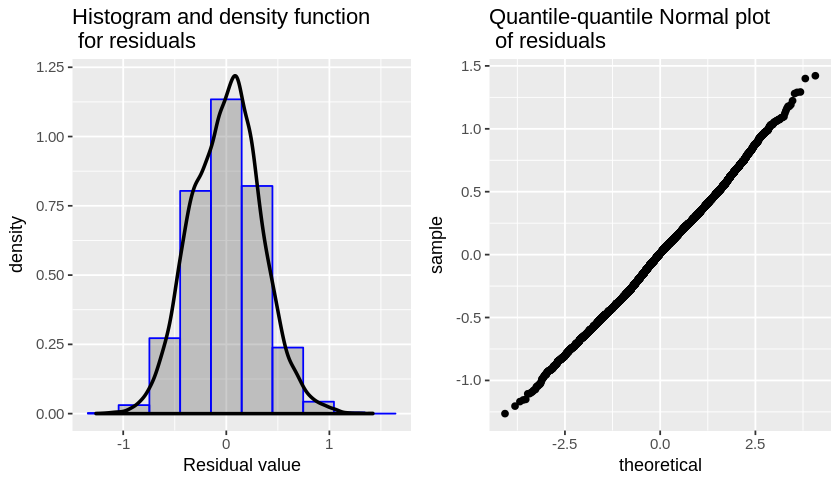

In [24]:
plot_resids <- function(df){
  require(ggplot2)
  require(gridExtra)
  p1 = ggplot(df, aes(resids, ..density..)) + 
         geom_histogram(bins = 10, alpha = 0.3, color = 'blue') +
         geom_density(size = 1) +
         xlab('Residual value') +
         ggtitle('Histogram and density function \n for residuals')
  p2 = ggplot(df, aes(sample = resids)) + 
         geom_qq() + 
         ggtitle('Quantile-quantile Normal plot \n of residuals')
  grid.arrange(p1, p2, ncol = 2)  
}
options(repr.plot.width=7, repr.plot.height=4) ## set the plot area size
plot_resids(house2)

<div class="alert alert-block alert-info">Q31. Examine these plots. Do these residuals appear to be approximately Normally distributed and why? </div>
**ANS:** Yes, the histogram and density plot shows that the residuals are approximately Normally distributed. The qq-plot resembles a straight line, indicating that the residuals are approximately Normal.

Another important properties of residuals is that they are homoscedastic. Use ggplot2 to create a plot of the residuals vs. the scored (predicted) values. **Hint** Make sure you include a loess trend line on your plot with `geom_smooth`. 

`geom_smooth()` using method = 'gam'


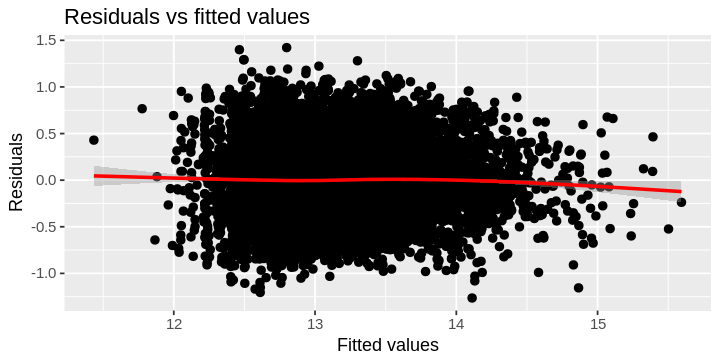

In [25]:
#Kernel keeps crashing if I run the notebook cells in order and use method = "loess" here. 
#Using method = "auto" instead...
scatter_resids <- function(df){
  require(ggplot2)
  ggplot(df, aes(score, resids)) + 
    geom_point(size = 2) +
    geom_smooth(size = 1, color = 'red', method = "auto") +
    ggtitle('Residuals vs fitted values') +
    xlab('Fitted values') + ylab('Residuals')
}
options(repr.plot.width=6, repr.plot.height=3) ## set the plot area size
scatter_resids(house2)

<div class="alert alert-block alert-info">Q32. Are these residuals homoscedastic or heteroscedastic and why? </div>
**ANS:** Homoscedastic. The residuals are relatively constant with respect to the score/predicted values. The non-linear trend line is close to 0 and relatively straight.

## Summary

In this challenge you have done the following:
- Loaded the data set on the prices and features of homes in King County, Washington USA.
- Perform some transformations on the label and features in the data set.
- Used visualizations to explore the relationships in the data set.
- Used summary statistics and hypothesis tests to verify some relationships in the data.
- Created and evaluated a linear regression model to predict the price of homes. 